In [2]:
import livef1
from livef1.utils.constants import interpolation_map

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

session = livef1.get_session(season=2024, meeting_identifier="Spa", session_identifier="Race")

2025-01-14 23:13:35,534 : livef1 : INFO :: Selected meeting/session is:
Meeting Offname : FORMULA 1 ROLEX BELGIAN GRAND PRIX 2024
Meeting Name : Belgian Grand Prix
Meeting Circuit Shortname : Spa-Francorchamps
2025-01-14 23:13:35,535 : livef1 : INFO :: The meeting was received successfully.
2025-01-14 23:13:35,537 : livef1 : INFO :: Selected meeting/session is:
Session Name : Race
2025-01-14 23:13:35,538 : livef1 : INFO :: The session was received successfully.


In [3]:
from livef1.adapters import livetimingF1_request, livetimingF1_getdata
from urllib.parse import urljoin

data = livetimingF1_getdata(
    urljoin(session.full_path, session.topic_names_info["TimingData"]["StreamPath"]),
    stream=True
)

data

AttributeError: 'Session' object has no attribute 'topic_names_info'

In [4]:
res = session.get_data(dataName="Position")
df_pos = pd.DataFrame(res.value)
df_pos["Utc"] = pd.to_datetime(df_pos["Utc"])
df_pos["timestamp"] = pd.to_datetime(df_pos["timestamp"])
df_pos["min"] = df_pos["Utc"].dt.minute
df_pos["hour"] = df_pos["Utc"].dt.hour
df_pos["sec"] = df_pos["Utc"].dt.second

2025-01-14 23:14:06,140 : livef1 : INFO :: Getting requested data.
Selected session : 2024 Belgian Grand Prix Race
Topic : Position.z
2025-01-14 23:14:06,598 : livef1 : INFO :: Data is successfully received.
2025-01-14 23:14:07,395 : livef1 : INFO :: Data is successfully parsed.
/tmp/ipykernel_149594/3877280185.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pos["timestamp"] = pd.to_datetime(df_pos["timestamp"])


In [5]:
res = session.get_data(dataName="Car_Data")
df_car = pd.DataFrame(res.value)
df_car["Utc"] = pd.to_datetime(df_car["Utc"])
df_car["timestamp"] = pd.to_datetime(df_car["timestamp"])
df_car["min"] = df_car["Utc"].dt.minute
df_car["hour"] = df_car["Utc"].dt.hour
df_car["sec"] = df_car["Utc"].dt.second

2025-01-14 23:14:08,390 : livef1 : INFO :: Getting requested data.
Selected session : 2024 Belgian Grand Prix Race
Topic : CarData.z
2025-01-14 23:14:08,778 : livef1 : INFO :: Data is successfully received.
2025-01-14 23:14:10,011 : livef1 : INFO :: Data is successfully parsed.
/tmp/ipykernel_149594/2737685464.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_car["timestamp"] = pd.to_datetime(df_car["timestamp"])


In [ ]:
df_car.columns.tolist()

In [28]:
# display(df_pos[df_pos['DriverNo'] == "44"].iloc[168:1000].head(10))
# display(df_car[df_car['DriverNo'] == "44"].head(10))

# df_44 = df_pos[df_pos['DriverNo'] == "44"].reset_index()
# df_44["time_diff"] = (df_44["Utc"] - df_44["Utc"].shift(1)).dt.total_seconds()
# df_44[df_44["time_diff"] < 0.1]
# df_44.loc[108:118]
df = df_car.set_index("Utc").join(df_pos.set_index("Utc"), rsuffix="_pos", how="outer")

In [84]:
df_44 = df[(df["DriverNo"] == "44") | (df["DriverNo_pos"] == "44")]
df_44

,SessionKey,timestamp,DriverNo,rpm,speed,n_gear,throttle,brake,drs,min,...,SessionKey_pos,timestamp_pos,DriverNo_pos,Status,X,Y,Z,min_pos,hour_pos,sec_pos
Utc,,,,,,,,,,,,,,,,,,,,,
2024-07-28 12:10:22.787731300+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9574.0,2025-01-10 00:01:45.570,44,OnTrack,0.0,0.0,0.0,10.0,12.0,22.0
2024-07-28 12:10:23.107682700+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9574.0,2025-01-10 00:01:45.570,44,OnTrack,0.0,0.0,0.0,10.0,12.0,23.0
2024-07-28 12:10:23.307652300+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9574.0,2025-01-10 00:01:45.570,44,OnTrack,0.0,0.0,0.0,10.0,12.0,23.0
2024-07-28 12:10:23.547615800+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9574.0,2025-01-10 00:01:45.570,44,OnTrack,0.0,0.0,0.0,10.0,12.0,23.0
2024-07-28 12:10:23.927558+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9574.0,2025-01-10 00:01:46.630,44,OnTrack,0.0,0.0,0.0,10.0,12.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-28 14:25:44.870164400+00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9574.0,2025-01-10 02:17:06.893,44,OnTrack,1050.0,2542.0,4143.0,25.0,14.0,44.0
2024-07-28 14:25:44.910215600+00:00,9574.0,2025-01-10 02:17:07.573,44,0.0,0.0,0.0,104.0,104.0,0.0,25.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-28 14:25:45.230168200+00:00,9574.0,2025-01-10 02:17:07.573,44,0.0,0.0,0.0,104.0,104.0,0.0,25.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_44["X"] = df_44.reset_index()["X"].astype(float).interpolate(method = "quadratic", order = 2).values
df_44["Y"] = df_44.reset_index()["Y"].astype(float).interpolate(method = "quadratic", order = 2).values

C:\Users\EU10698\AppData\Local\Temp\ipykernel_22480\4038674442.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\EU10698\AppData\Local\Temp\ipykernel_22480\4038674442.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
from plotly import express as px
df_temp = df[(df["DriverNo"] == "44") | (df["DriverNo_pos"] == "44")].iloc[22000:23500]
px.scatter(x = df_temp.X, y = df_temp.Y)

In [95]:
df_temp = df_44.iloc[22000:23900][~df_44["SessionKey"].isnull()]
px.scatter(x = df_temp.X, y = df_temp.Y)

C:\Users\EU10698\AppData\Local\Temp\ipykernel_22480\1169601629.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
df_temp = df_44.iloc[22000:23900]
px.scatter(x = df_temp.X, y = df_temp.Y)

In [83]:
df_44["speed"] = df_44.reset_index()["speed"].astype(float).interpolate(method = "polynomial", order = 2).values
df_temp = df_44.iloc[22000:23500]
df_temp["fill"] = df_temp["DriverNo_pos"].isnull()
px.scatter(df_temp, x = df_temp.index, y = "speed", color="fill")

C:\Users\EU10698\AppData\Local\Temp\ipykernel_22480\3027563336.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\EU10698\AppData\Local\Temp\ipykernel_22480\3027563336.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
res = session.get_data(dataName="Weather_Data")
df_weather = pd.DataFrame(res.value)
df_weather["timestamp"] = pd.to_datetime(df_weather["timestamp"])

2025-01-10 09:52:41,401 : livef1 : INFO :: Getting requested data.
Selected session : 2024 Belgian Grand Prix Race
Topic : WeatherData
2025-01-10 09:52:42,245 : livef1 : INFO :: Data is successfully received.
2025-01-10 09:52:42,248 : livef1 : INFO :: Data is successfully parsed.
C:\Users\EU10698\AppData\Local\Temp\ipykernel_22480\1479434450.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_weather["timestamp"] = pd.to_datetime(df_weather["timestamp"])


In [7]:
idx_cols = ["hour","min","sec","DriverNo"]
df = df_car.set_index(idx_cols).join(df_pos.set_index(idx_cols), rsuffix="_")

In [ ]:
c = pd.to_datetime(df_car[(df_car["min"] == 2) & (df_car["hour"] == 0)].timestamp).unique()
p = pd.to_datetime(df_w[(df_w["min"] == 2) & (df_w["hour"] == 0) & (df_w["sec"] > 27)].timestamp).unique()

for i in c-p:
    print(i.total_seconds())

In [8]:
df_all = df.reset_index().set_index("timestamp").join(df_weather.set_index("timestamp"), rsuffix="_w_", how="outer")

In [59]:
df_car[df_car["DriverNo"] == "44"]

,SessionKey,timestamp,Utc,DriverNo,rpm,speed,n_gear,throttle,brake,drs,min,hour,sec
15,9574,00:02:28.746,2024-07-28T12:11:06.7233441Z,44,0,0,0,0,0,0,2,0,28
35,9574,00:02:29.866,2024-07-28T12:11:07.0432965Z,44,0,0,0,0,0,0,2,0,29
55,9574,00:02:29.866,2024-07-28T12:11:07.4432373Z,44,0,0,0,0,0,0,2,0,29
75,9574,00:02:29.866,2024-07-28T12:11:07.6032133Z,44,0,0,0,0,0,0,2,0,29
95,9574,00:02:29.866,2024-07-28T12:11:07.8431771Z,44,0,0,0,0,0,0,2,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607035,9574,02:17:06.613,2024-07-28T14:25:44.3492992Z,44,0,0,0,104,104,0,17,2,6
607055,9574,02:17:06.613,2024-07-28T14:25:44.5902637Z,44,0,0,0,104,104,0,17,2,6
607075,9574,02:17:07.573,2024-07-28T14:25:44.9102156Z,44,0,0,0,104,104,0,17,2,7
607095,9574,02:17:07.573,2024-07-28T14:25:45.2301682Z,44,0,0,0,104,104,0,17,2,7


In [63]:
df.reset_index()[df.reset_index()["DriverNo"] == "44"]

,hour,min,sec,DriverNo,SessionKey,timestamp,Utc,rpm,speed,n_gear,throttle,brake,drs,SessionKey_,timestamp_,Utc_,Status,X,Y,Z
60,0,2,28,44,9574,00:02:28.746,2024-07-28T12:11:06.7233441Z,0,0,0,0,0,0,9574.0,00:02:28.731,2024-07-28T12:11:05.9481753Z,OnTrack,0.0,0.0,0.0
61,0,2,28,44,9574,00:02:28.746,2024-07-28T12:11:06.7233441Z,0,0,0,0,0,0,9574.0,00:02:28.731,2024-07-28T12:11:06.2081363Z,OnTrack,0.0,0.0,0.0
62,0,2,28,44,9574,00:02:28.746,2024-07-28T12:11:06.7233441Z,0,0,0,0,0,0,9574.0,00:02:28.731,2024-07-28T12:11:06.5080908Z,OnTrack,0.0,0.0,0.0
63,0,2,28,44,9574,00:02:28.746,2024-07-28T12:11:06.7233441Z,0,0,0,0,0,0,9574.0,00:02:28.731,2024-07-28T12:11:06.7080604Z,OnTrack,0.0,0.0,0.0
125,0,2,29,44,9574,00:02:29.866,2024-07-28T12:11:07.0432965Z,0,0,0,0,0,0,9574.0,00:02:29.690,2024-07-28T12:11:07.0280118Z,OnTrack,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460122,2,17,6,44,9574,02:17:06.613,2024-07-28T14:25:44.5902637Z,0,0,0,104,104,0,9574.0,02:17:06.893,2024-07-28T14:25:44.7101887Z,OnTrack,1050.0,2542.0,4143.0
2460123,2,17,6,44,9574,02:17:06.613,2024-07-28T14:25:44.5902637Z,0,0,0,104,104,0,9574.0,02:17:06.893,2024-07-28T14:25:44.8701644Z,OnTrack,1050.0,2542.0,4143.0
2460155,2,17,7,44,9574,02:17:07.573,2024-07-28T14:25:44.9102156Z,0,0,0,104,104,0,9574.0,02:17:07.353,2024-07-28T14:25:45.3300945Z,OnTrack,1050.0,2542.0,4143.0
2460175,2,17,7,44,9574,02:17:07.573,2024-07-28T14:25:45.2301682Z,0,0,0,104,104,0,9574.0,02:17:07.353,2024-07-28T14:25:45.3300945Z,OnTrack,1050.0,2542.0,4143.0


In [ ]:
df_all[df_all["DriverNo"] == "44"].reset_index().iloc[44000:50000]

## Weather Data

In [9]:
for col in interpolation_map:
    df_all[col] = df_all.reset_index()[col].astype(float).interpolate(method = interpolation_map[col], order = 2).values

C:\Users\EU10698\AppData\Local\Temp\ipykernel_30940\1671086174.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_temp.index), df_temp["AirTemp"])
C:\Users\EU10698\AppData\Local\Temp\ipykernel_30940\1671086174.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_temp.index), df_temp["AirTemp"])


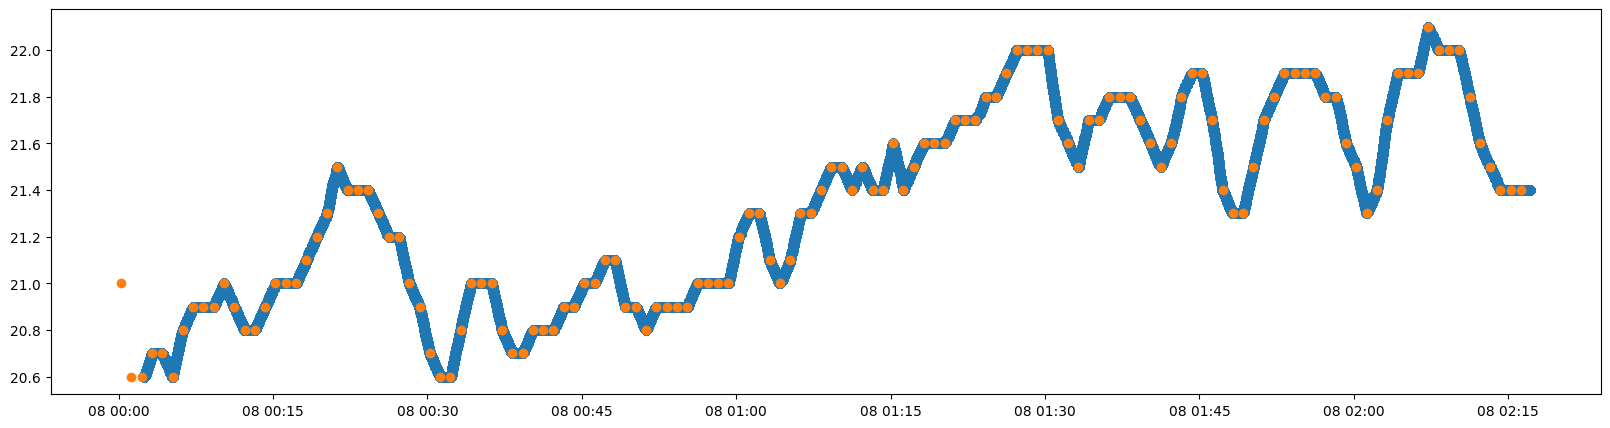

In [15]:
import matplotlib.pyplot as plt

df_temp = df_all[~df_all["DriverNo"].isnull()]
plt.figure(figsize=(20,5))
plt.scatter(pd.to_datetime(df_temp.index), df_temp["AirTemp"])
df_temp = df_all[df_all["DriverNo"].isnull()]
plt.scatter(pd.to_datetime(df_temp.index), df_temp["AirTemp"])
plt.show()

In [16]:
df_all.dropna(subset="DriverNo")

,hour,min,sec,DriverNo,SessionKey,Utc,rpm,speed,n_gear,throttle,...,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,min_w_,hour_w_,sec_w_
timestamp,,,,,,,,,,,,,,,,,,,,,
00:02:28.746,0.0,2.0,28.0,1,9574.0,2024-07-28T12:11:06.7233441Z,0.0,0.0,0.0,0.0,...,20.600008,51.999924,978.000008,0.0,42.199985,283.996961,0.157242,NaN,NaN,NaN
00:02:28.746,0.0,2.0,28.0,1,9574.0,2024-07-28T12:11:06.7233441Z,0.0,0.0,0.0,0.0,...,20.600015,51.999848,978.000015,0.0,42.199970,283.993921,-0.385400,NaN,NaN,NaN
00:02:28.746,0.0,2.0,28.0,1,9574.0,2024-07-28T12:11:06.7233441Z,0.0,0.0,0.0,0.0,...,20.600023,51.999772,978.000023,0.0,42.199954,283.990882,-0.927926,NaN,NaN,NaN
00:02:28.746,0.0,2.0,28.0,1,9574.0,2024-07-28T12:11:06.7233441Z,0.0,0.0,0.0,0.0,...,20.600030,51.999696,978.000030,0.0,42.199939,283.987843,-1.470336,NaN,NaN,NaN
00:02:28.746,0.0,2.0,28.0,2,9574.0,2024-07-28T12:11:06.7233441Z,0.0,0.0,0.0,0.0,...,20.600038,51.999620,978.000038,0.0,42.199924,283.984804,-2.012631,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02:17:07.573,2.0,17.0,7.0,44,9574.0,2024-07-28T14:25:45.5501208Z,0.0,0.0,0.0,104.0,...,21.400000,46.000000,978.100000,0.0,42.900000,322.000000,NaN,NaN,NaN,NaN
02:17:07.573,2.0,17.0,7.0,55,9574.0,2024-07-28T14:25:45.5501208Z,0.0,0.0,0.0,0.0,...,21.400000,46.000000,978.100000,0.0,42.900000,322.000000,NaN,NaN,NaN,NaN
02:17:07.573,2.0,17.0,7.0,63,9574.0,2024-07-28T14:25:45.5501208Z,0.0,0.0,0.0,104.0,...,21.400000,46.000000,978.100000,0.0,42.900000,322.000000,NaN,NaN,NaN,NaN


## Position Data

In [10]:
df_all.dtypes

hour             float64
min              float64
sec              float64
DriverNo          object
SessionKey       float64
Utc               object
rpm              float64
speed            float64
n_gear           float64
throttle         float64
brake            float64
drs              float64
SessionKey_      float64
timestamp_        object
Utc_              object
Status            object
X                float64
Y                float64
Z                float64
SessionKey_w_    float64
AirTemp          float64
Humidity         float64
Pressure         float64
Rainfall         float64
TrackTemp        float64
WindDirection    float64
WindSpeed        float64
min_w_           float64
hour_w_          float64
sec_w_           float64
dtype: object

C:\Users\EU10698\AppData\Local\Temp\ipykernel_30940\933551003.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_temp.index), df_temp["speed"])
C:\Users\EU10698\AppData\Local\Temp\ipykernel_30940\933551003.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_temp.index), df_temp["speed"])


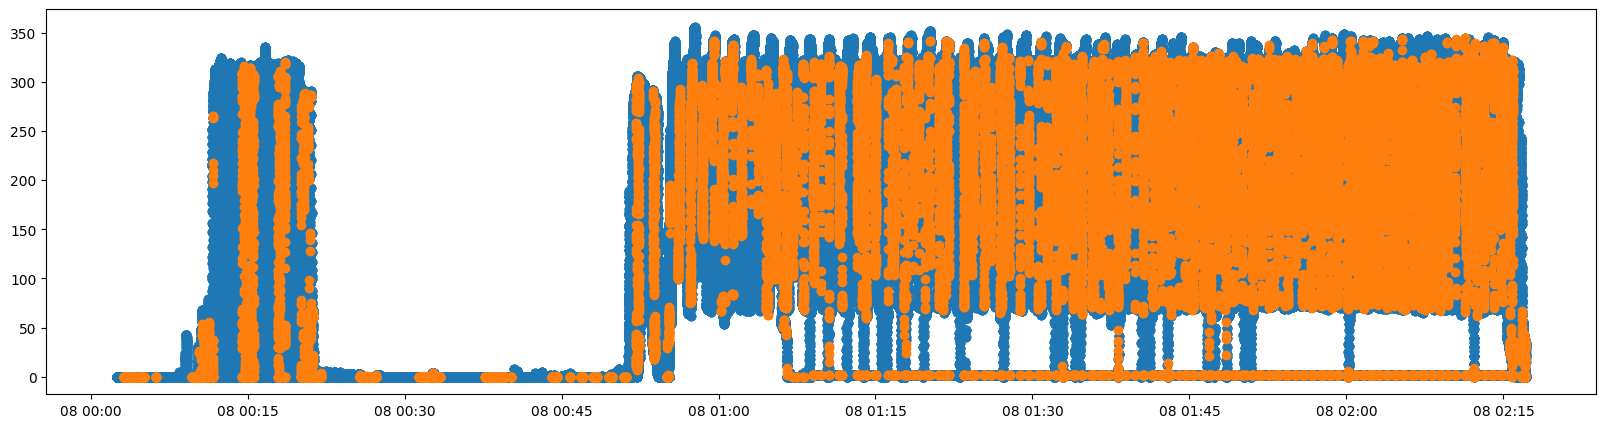

In [27]:
df_temp = df_all[~df_all["X"].isnull()]
plt.figure(figsize=(20,5))
plt.scatter(pd.to_datetime(df_temp.index), df_temp["speed"])
df_temp = df_all[df_all["X"].isnull()]
plt.scatter(pd.to_datetime(df_temp.index), df_temp["speed"])
plt.show()

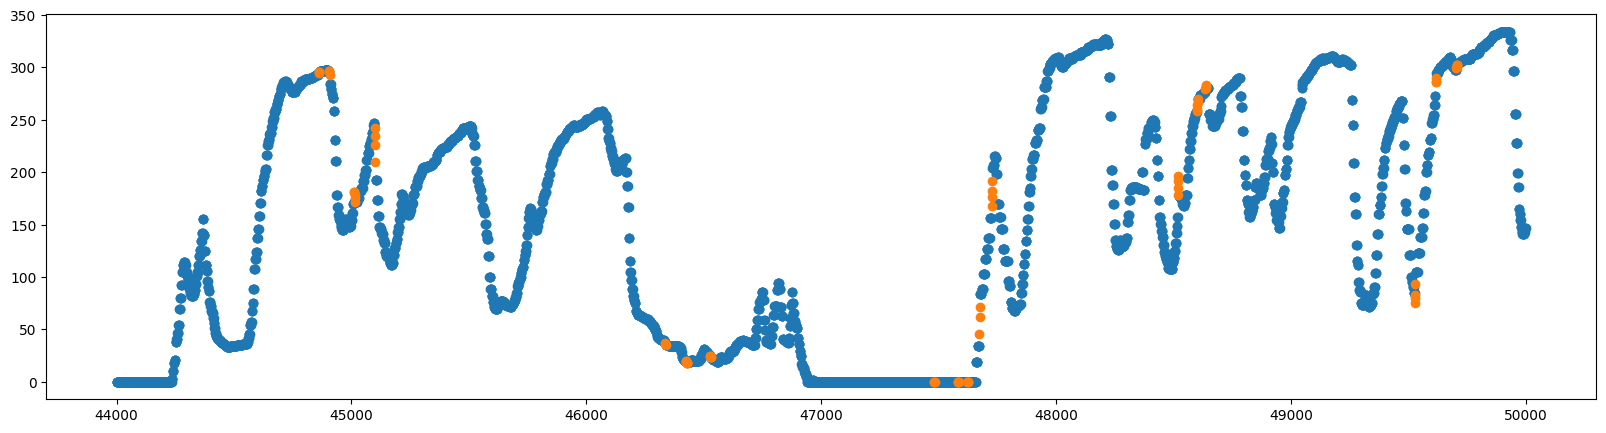

/tmp/ipykernel_10993/1516865387.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_temp.timestamp), df_temp["speed"])


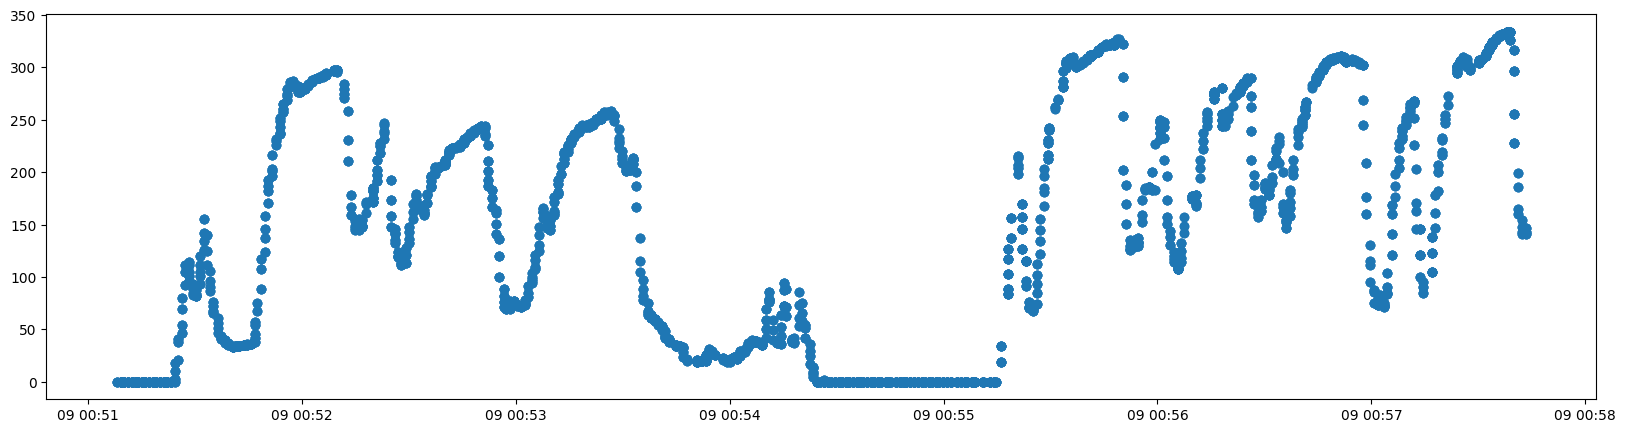

In [54]:
df_44 = df_all[df_all["DriverNo"] == "44"].reset_index().iloc[44000:50000]

df_temp = df_44[~df_44["X"].isnull()]
plt.figure(figsize=(20,5))
plt.scatter(df_temp.index, df_temp["speed"])

df_temp = df_44[df_44["X"].isnull()]
plt.scatter(df_temp.index, df_temp["speed"])
plt.show()


df_temp = df_44[~df_44["X"].isnull()]
plt.figure(figsize=(20,5))
plt.scatter(pd.to_datetime(df_temp.timestamp), df_temp["speed"])
plt.show()

In [43]:
pd.to_datetime(df_44.timestamp).dt.time - pd.to_datetime(df_44.timestamp).shift(1).dt.time

/tmp/ipykernel_10993/166875415.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_44.timestamp).dt.time - pd.to_datetime(df_44.timestamp).shift(1).dt.time
/tmp/ipykernel_10993/166875415.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_44.timestamp).dt.time - pd.to_datetime(df_44.timestamp).shift(1).dt.time


TypeError: unsupported operand type(s) for -: 'datetime.time' and 'datetime.time'

In [56]:
df_44.head(50)

,timestamp,hour,min,sec,DriverNo,SessionKey,Utc,rpm,speed,n_gear,...,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,min_w_,hour_w_,sec_w_
44000,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:45.5321501Z,4078.0,0.0,0.0,...,20.808981,50.0,978.108981,0.0,42.273056,38.497216,1.557009,NaN,NaN,NaN
44001,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:45.5321501Z,4078.0,0.0,0.0,...,20.808976,50.0,978.108976,0.0,42.273071,38.499284,1.556972,NaN,NaN,NaN
44002,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:46.0120781Z,4036.0,0.0,0.0,...,20.808669,50.0,978.108669,0.0,42.273994,38.619214,1.554787,NaN,NaN,NaN
44003,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:46.0120781Z,4036.0,0.0,0.0,...,20.808663,50.0,978.108663,0.0,42.274010,38.621282,1.554750,NaN,NaN,NaN
44004,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:46.0120781Z,4036.0,0.0,0.0,...,20.808658,50.0,978.108658,0.0,42.274026,38.623350,1.554712,NaN,NaN,NaN
44005,00:51:09.234,0.0,51.0,9.0,44,9574.0,2024-07-28T12:59:46.4120189Z,4115.0,0.0,0.0,...,20.808271,50.0,978.108271,0.0,42.275187,38.774296,1.551987,NaN,NaN,NaN
44006,00:51:09.234,0.0,51.0,9.0,44,9574.0,2024-07-28T12:59:46.4120189Z,4115.0,0.0,0.0,...,20.808266,50.0,978.108266,0.0,42.275203,38.776364,1.551950,NaN,NaN,NaN
44007,00:51:09.234,0.0,51.0,9.0,44,9574.0,2024-07-28T12:59:46.4120189Z,4115.0,0.0,0.0,...,20.808260,50.0,978.108260,0.0,42.275219,38.778432,1.551913,NaN,NaN,NaN
44008,00:51:09.234,0.0,51.0,9.0,44,9574.0,2024-07-28T12:59:46.4120189Z,4115.0,0.0,0.0,...,20.808255,50.0,978.108255,0.0,42.275235,38.780499,1.551876,NaN,NaN,NaN
44009,00:51:09.234,0.0,51.0,9.0,44,9574.0,2024-07-28T12:59:46.5719951Z,4126.0,0.0,0.0,...,20.807847,50.0,978.107847,0.0,42.276459,38.939717,1.549031,NaN,NaN,NaN


In [47]:
(pd.to_datetime(df_44.timestamp) - pd.to_datetime(df_44.timestamp).shift(1)).dt.total_microseconds()

/tmp/ipykernel_10993/2415542897.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(df_44.timestamp) - pd.to_datetime(df_44.timestamp).shift(1)).dt.total_microseconds()
/tmp/ipykernel_10993/2415542897.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(df_44.timestamp) - pd.to_datetime(df_44.timestamp).shift(1)).dt.total_microseconds()


AttributeError: 'TimedeltaProperties' object has no attribute 'total_microseconds'

In [52]:
df_44

,timestamp,hour,min,sec,DriverNo,SessionKey,Utc,rpm,speed,n_gear,...,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,min_w_,hour_w_,sec_w_
44000,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:45.5321501Z,4078.0,0.0,0.0,...,20.808981,50.0,978.108981,0.0,42.273056,38.497216,1.557009,NaN,NaN,NaN
44001,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:45.5321501Z,4078.0,0.0,0.0,...,20.808976,50.0,978.108976,0.0,42.273071,38.499284,1.556972,NaN,NaN,NaN
44002,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:46.0120781Z,4036.0,0.0,0.0,...,20.808669,50.0,978.108669,0.0,42.273994,38.619214,1.554787,NaN,NaN,NaN
44003,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:46.0120781Z,4036.0,0.0,0.0,...,20.808663,50.0,978.108663,0.0,42.274010,38.621282,1.554750,NaN,NaN,NaN
44004,00:51:08.035,0.0,51.0,8.0,44,9574.0,2024-07-28T12:59:46.0120781Z,4036.0,0.0,0.0,...,20.808658,50.0,978.108658,0.0,42.274026,38.623350,1.554712,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,00:57:43.276,0.0,57.0,43.0,44,9574.0,2024-07-28T13:06:20.7333996Z,9195.0,143.0,4.0,...,21.000000,48.0,978.100000,0.0,42.400000,311.000000,1.949400,NaN,NaN,NaN
49996,00:57:43.276,0.0,57.0,43.0,44,9574.0,2024-07-28T13:06:20.9733641Z,8781.0,147.0,4.0,...,21.000000,48.0,978.100000,0.0,42.400000,311.000000,1.949649,NaN,NaN,NaN
49997,00:57:43.276,0.0,57.0,43.0,44,9574.0,2024-07-28T13:06:20.9733641Z,8781.0,147.0,4.0,...,21.000000,48.0,978.100000,0.0,42.400000,311.000000,1.949652,NaN,NaN,NaN
49998,00:57:43.276,0.0,57.0,43.0,44,9574.0,2024-07-28T13:06:20.9733641Z,8781.0,147.0,4.0,...,21.000000,48.0,978.100000,0.0,42.400000,311.000000,1.949655,NaN,NaN,NaN


C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)


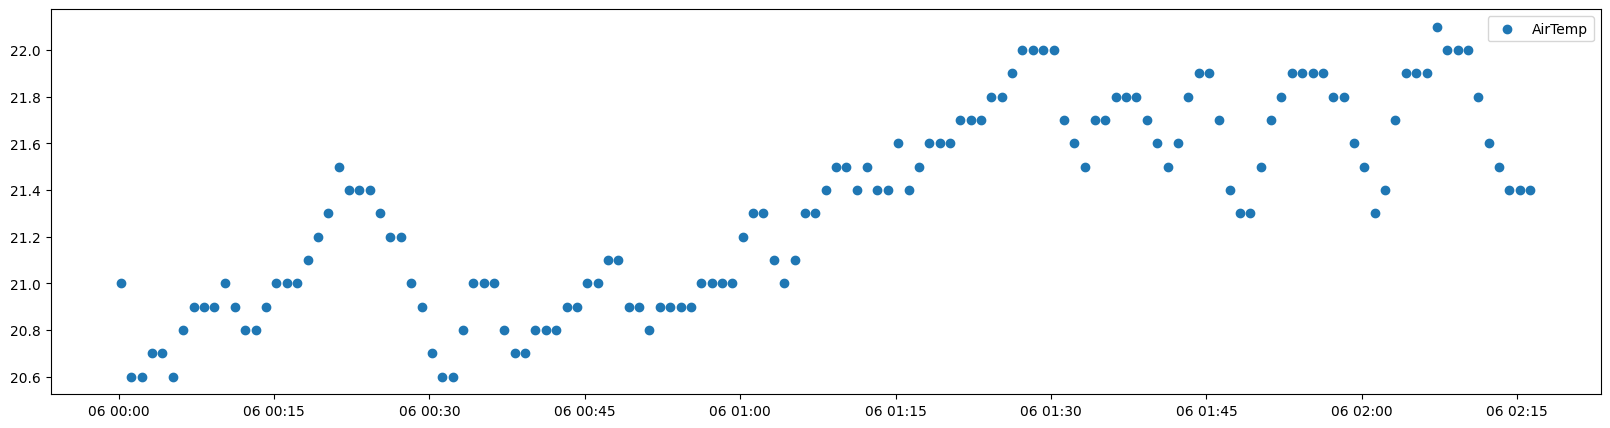

C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)


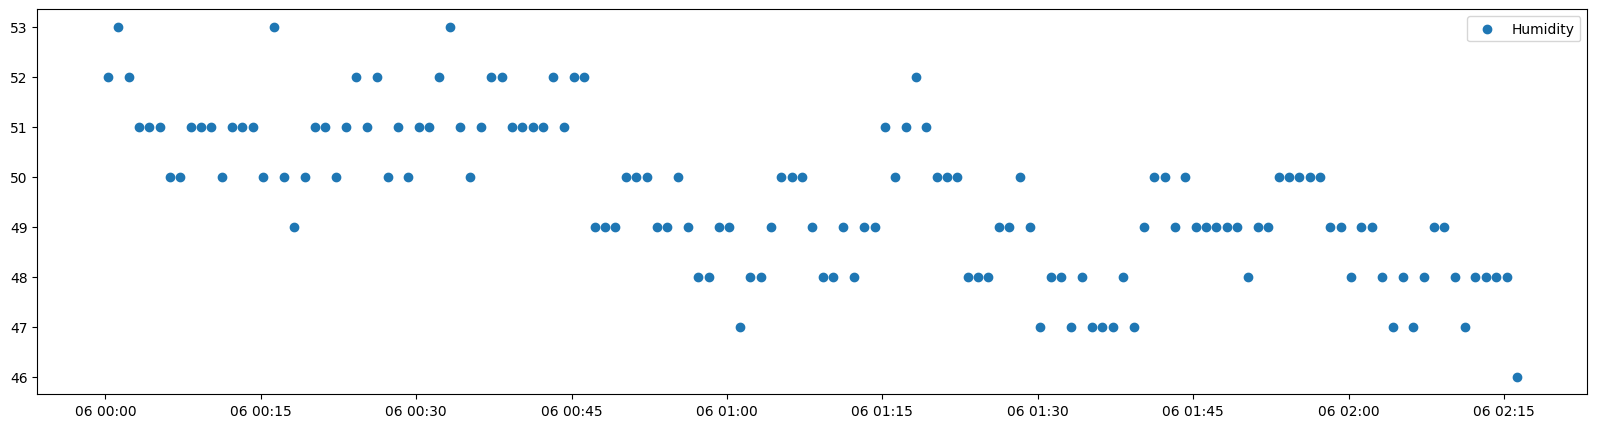

C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)


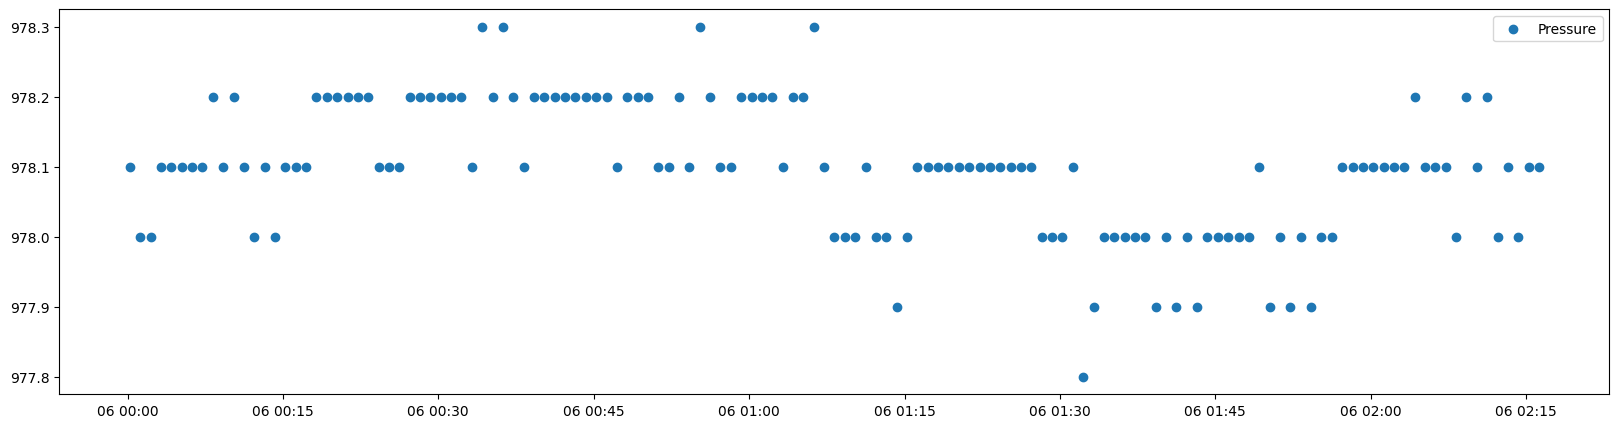

C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)


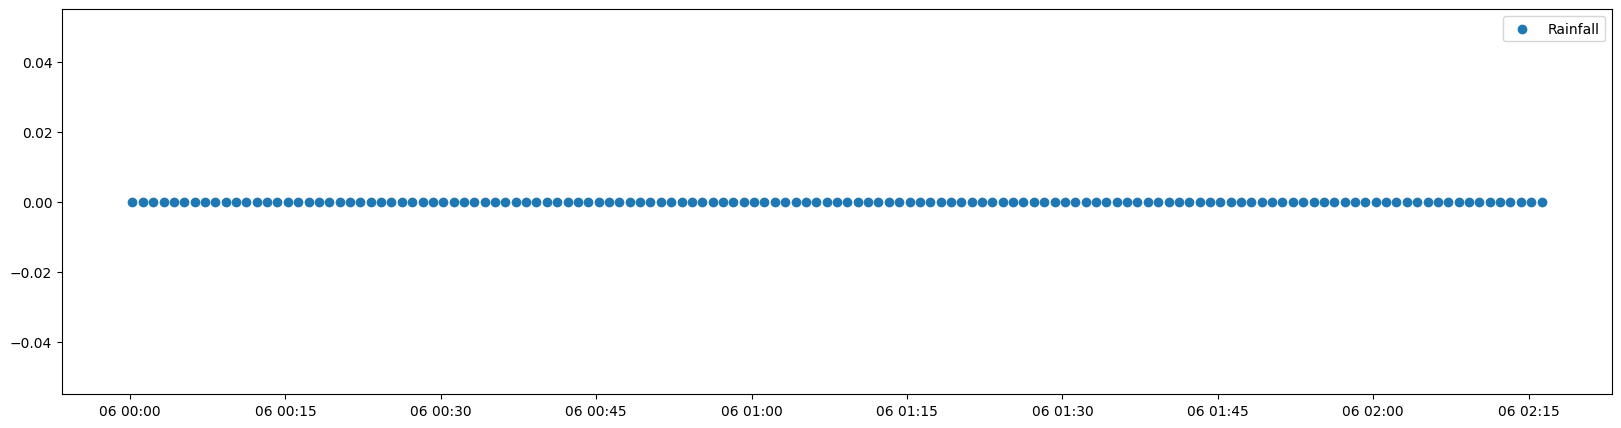

C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)


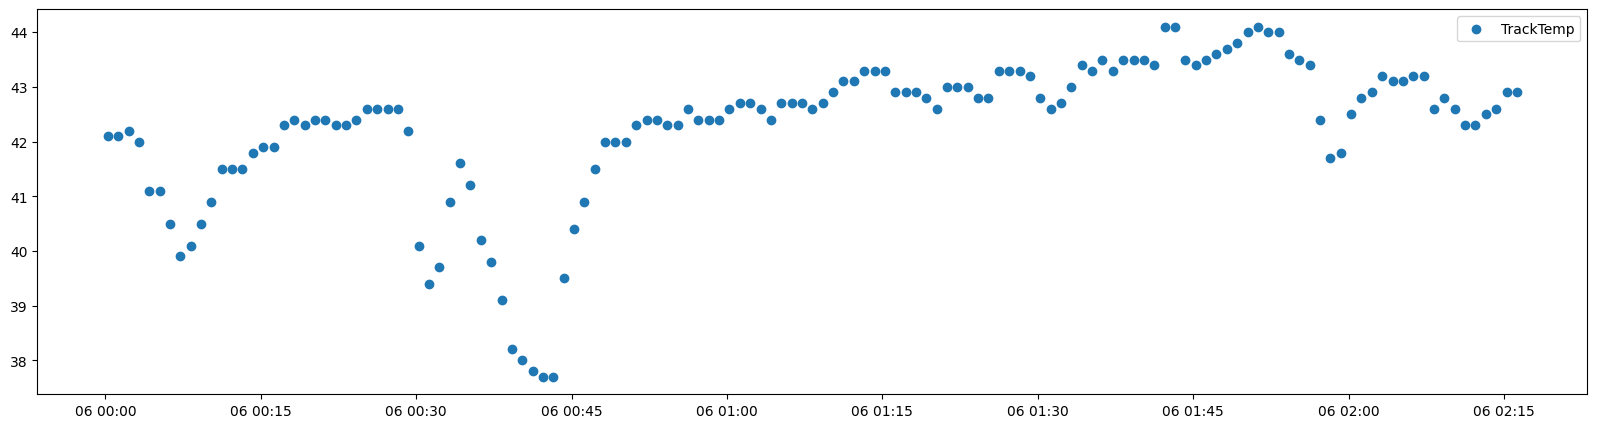

C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)


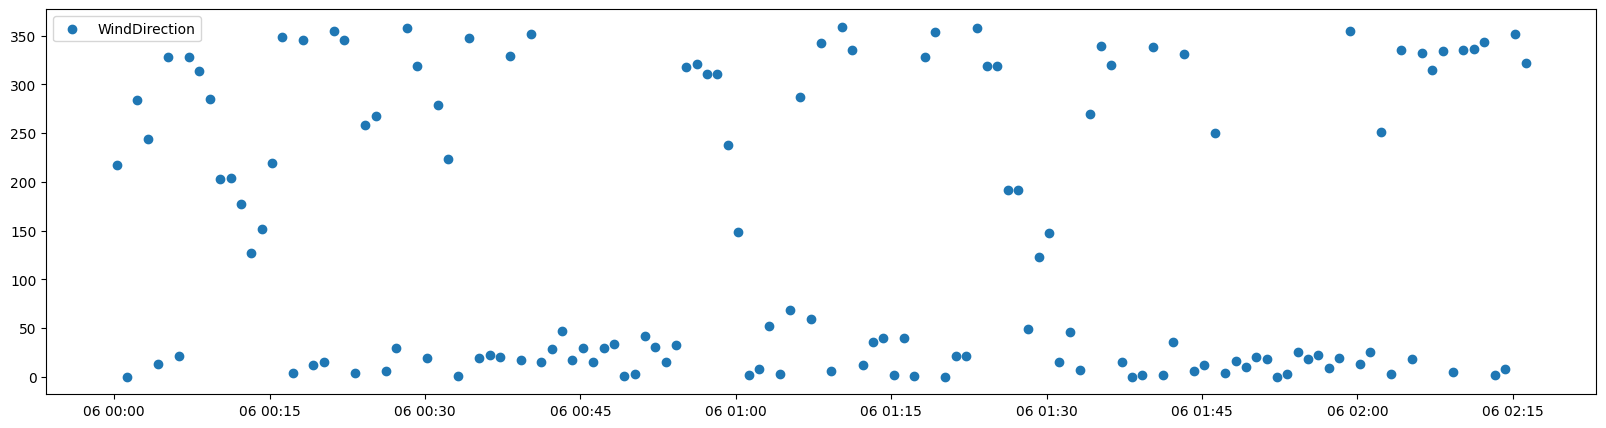

C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)


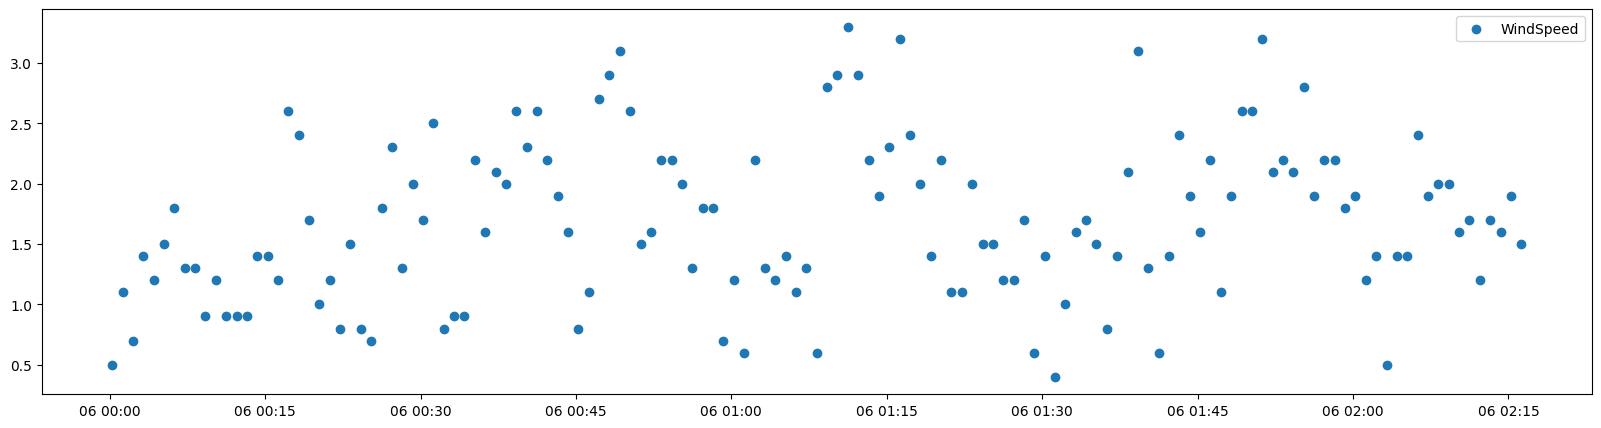

C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)


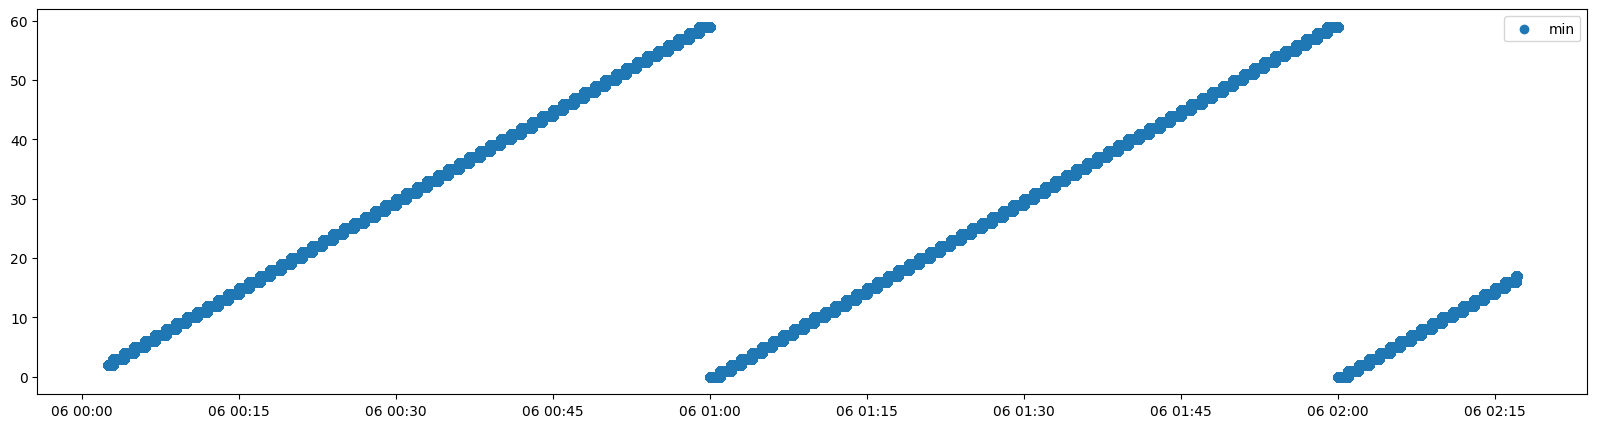

C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)


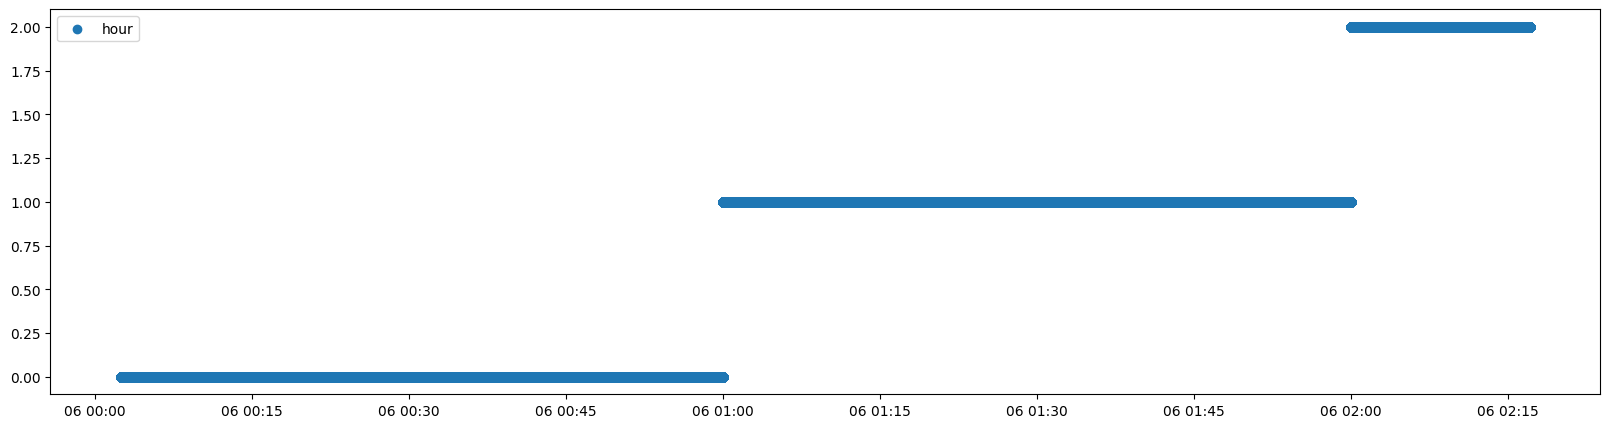

C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3702379747.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)
c:\Users\EU10698\venvs\goktugPy\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


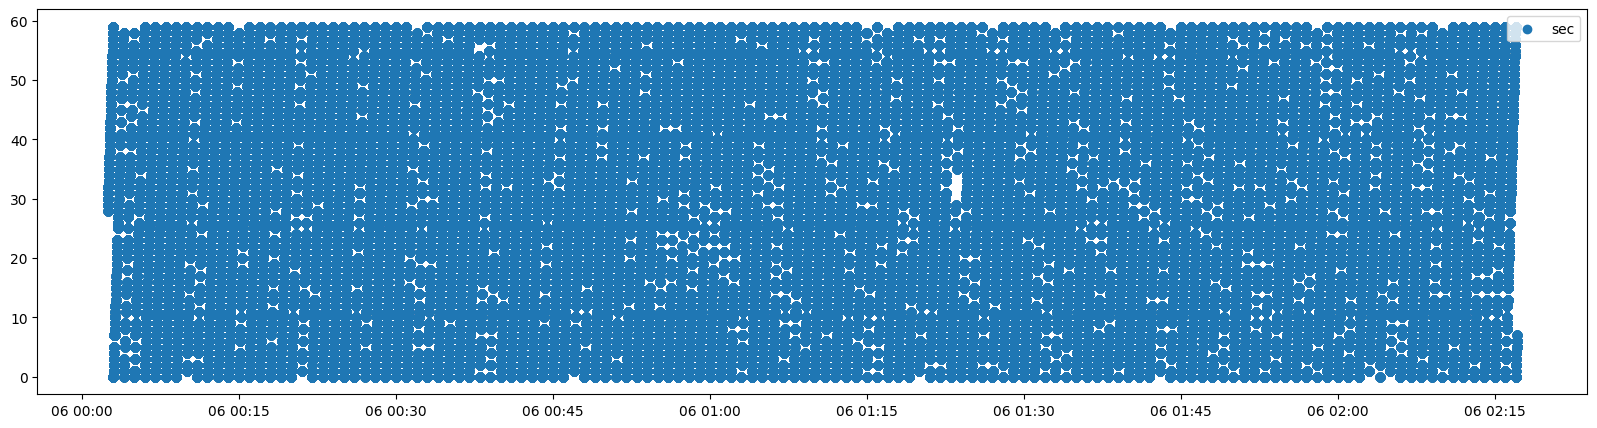

In [61]:
for col in df_weather.columns[2:]:
    plt.figure(figsize=(20,5))
    plt.scatter(pd.to_datetime(df_all.index).values, df_all[col].astype(float), label = col)
    plt.legend()
    plt.show()

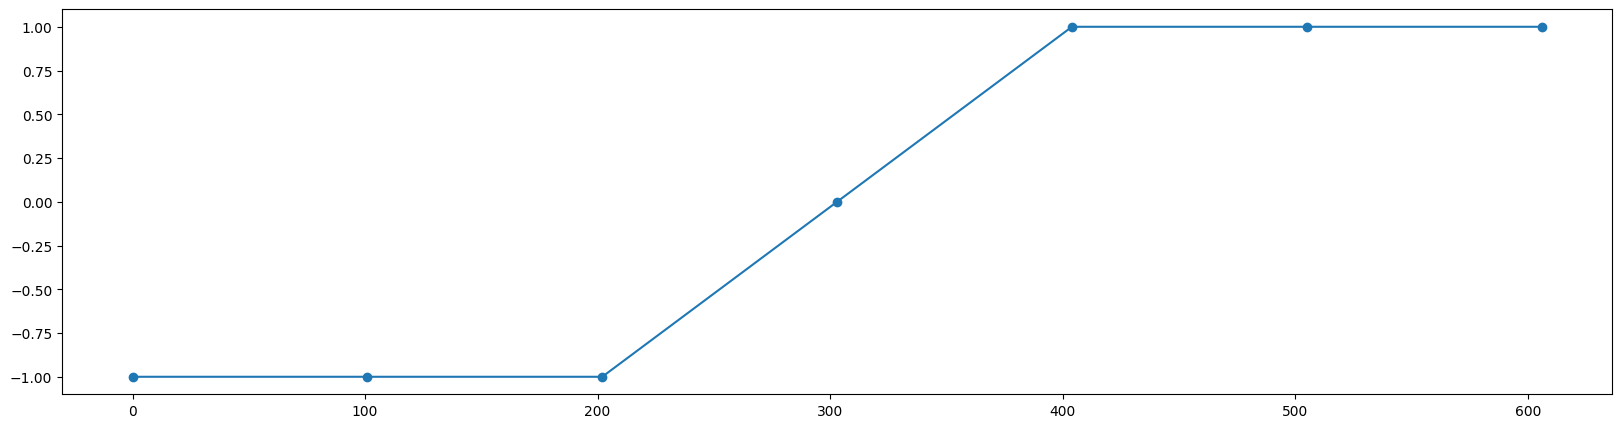

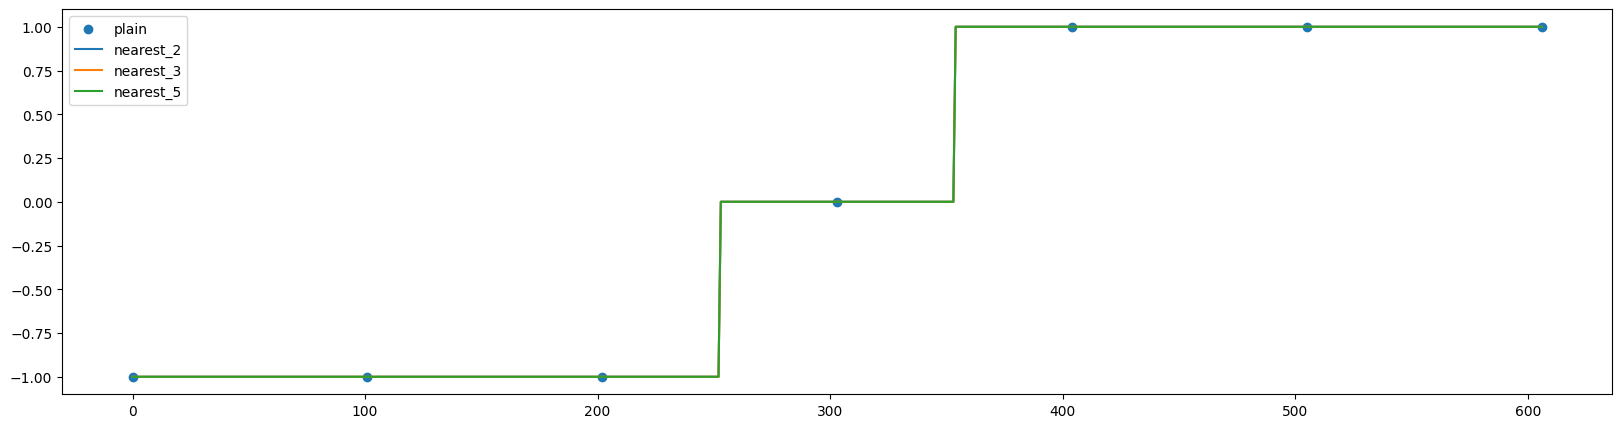

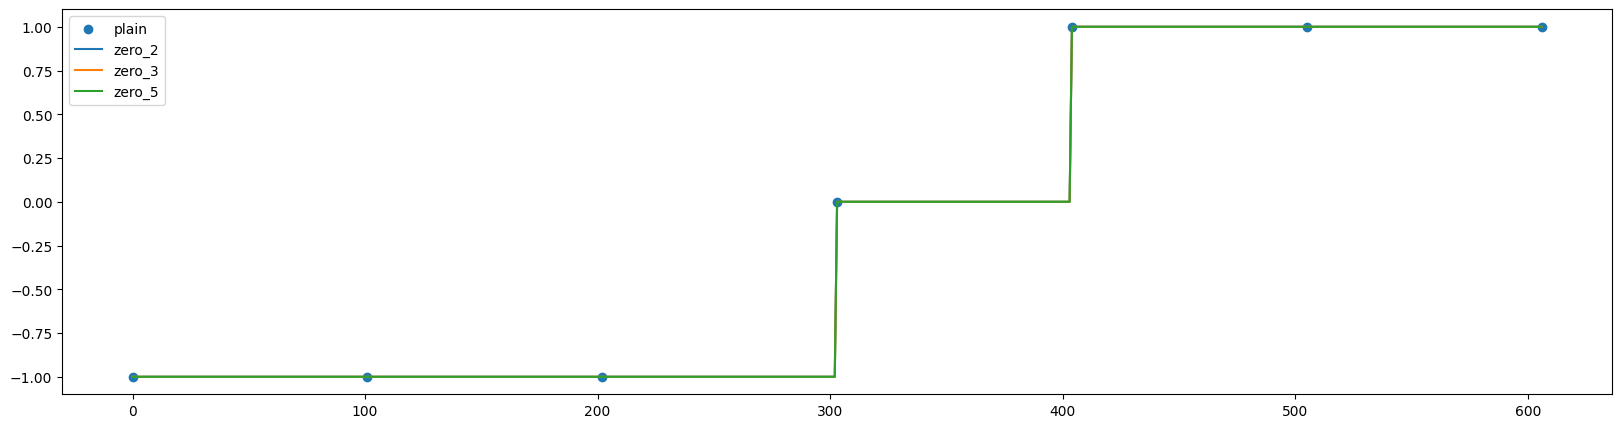

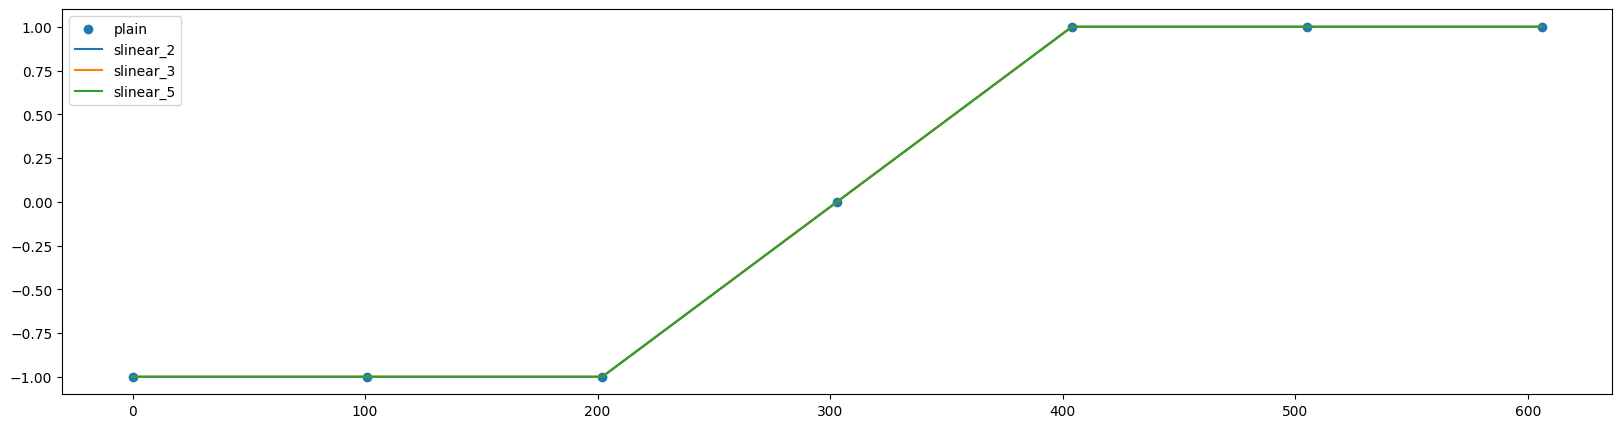

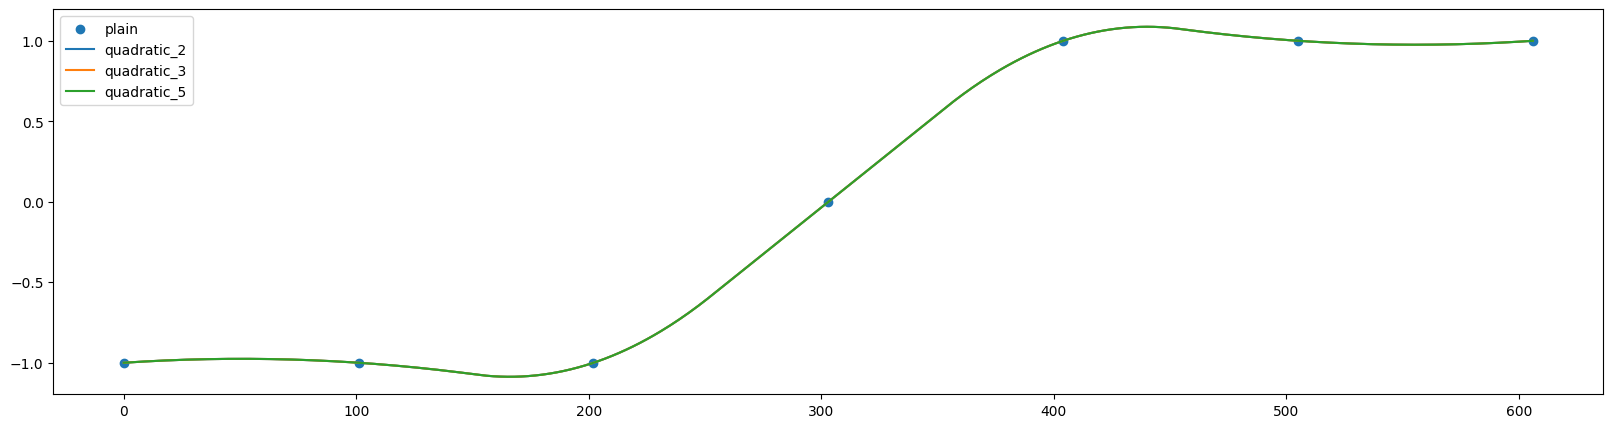

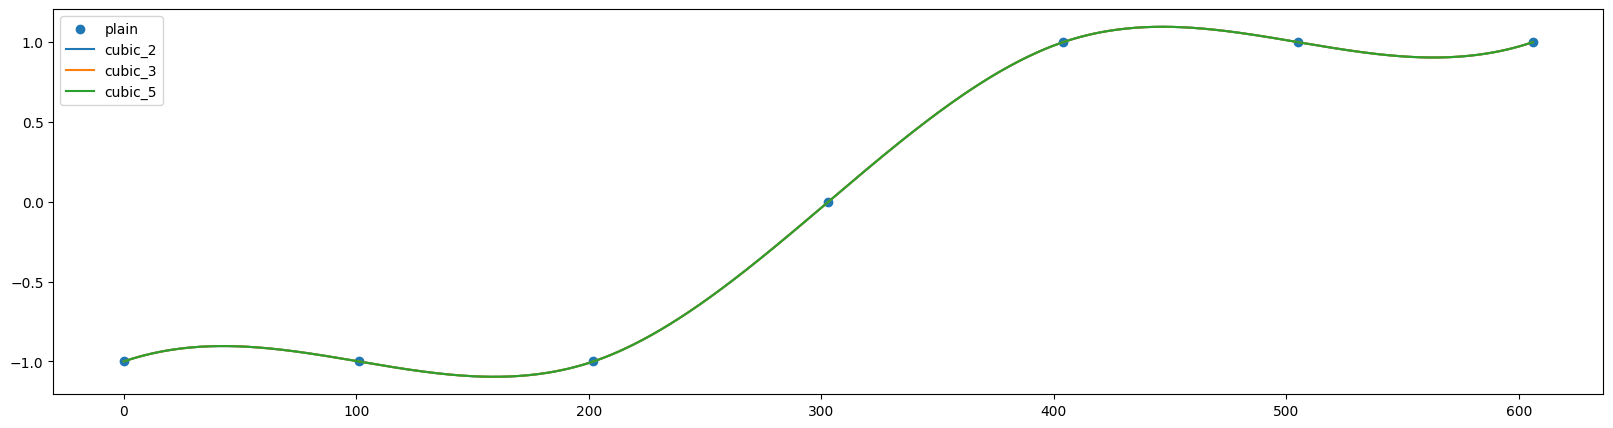

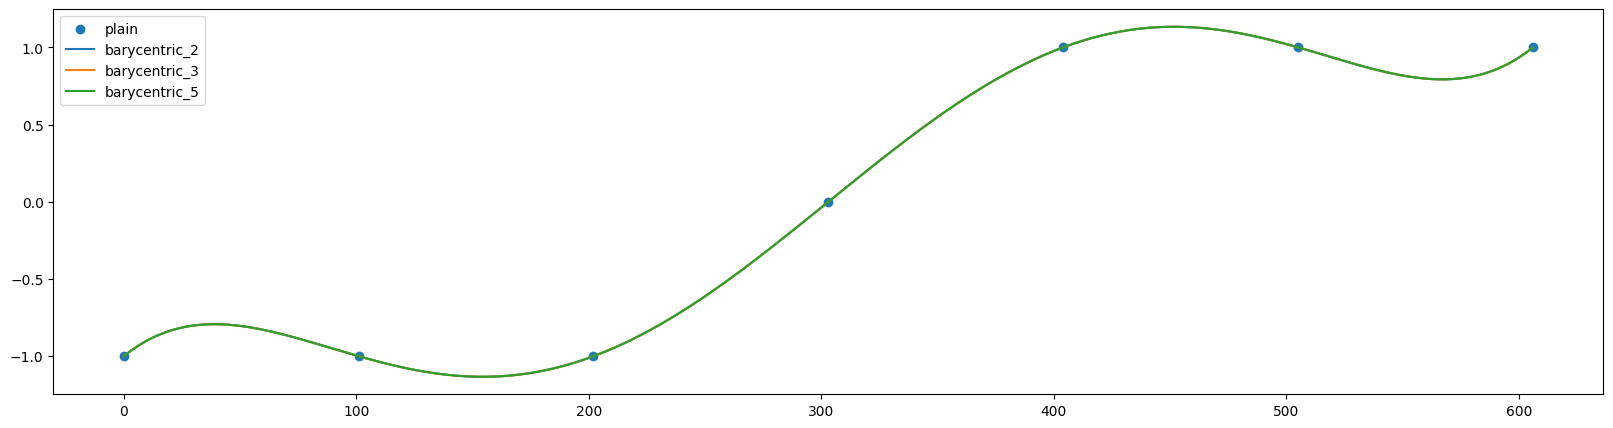

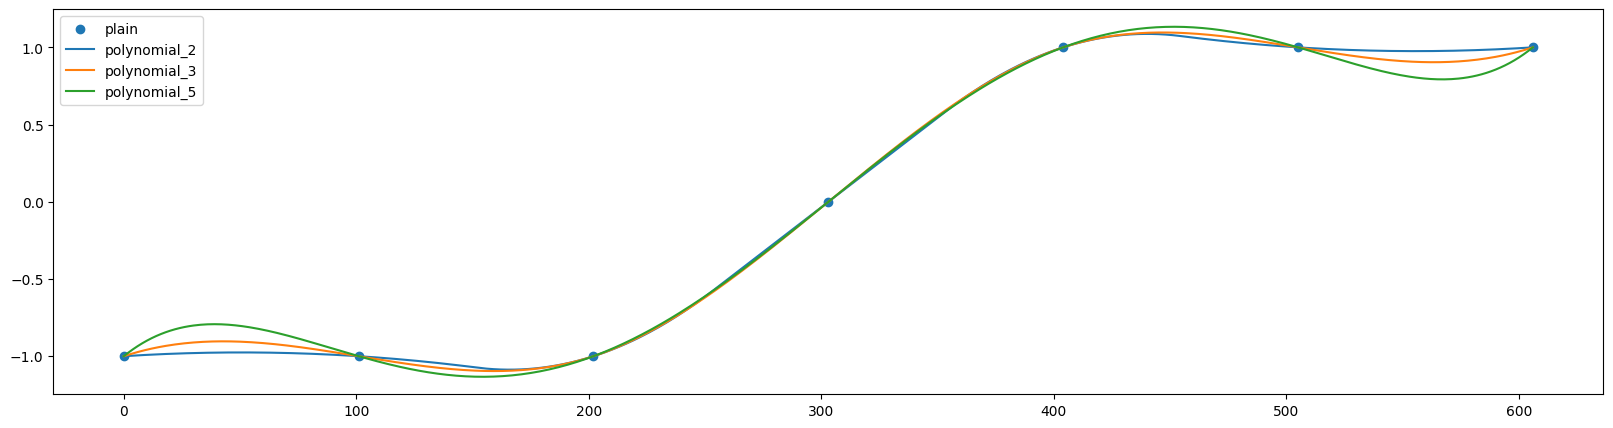

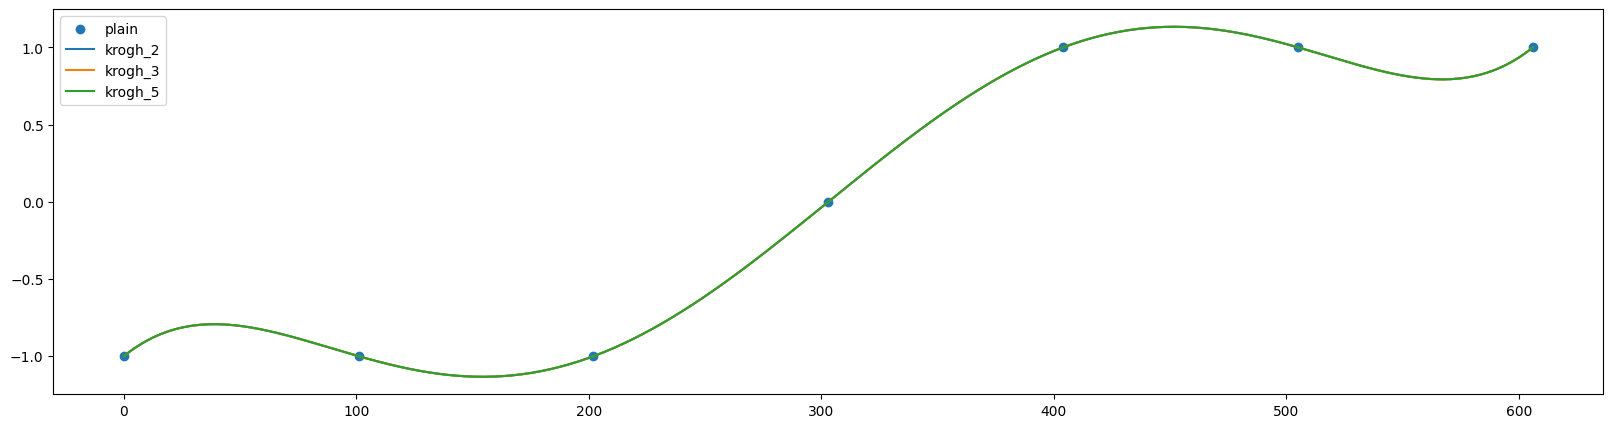

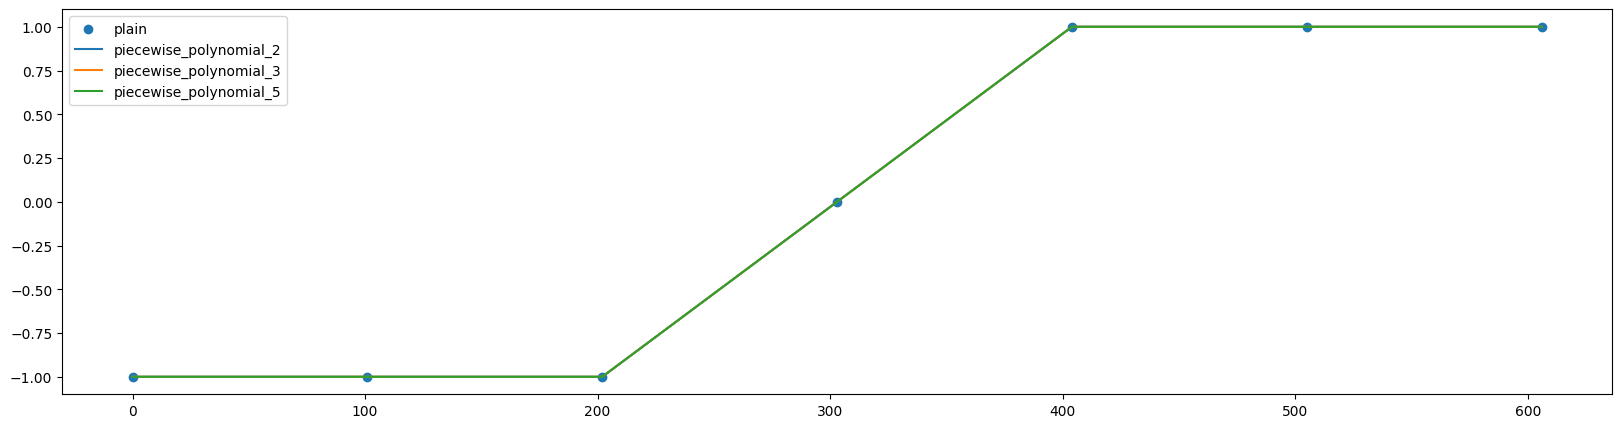

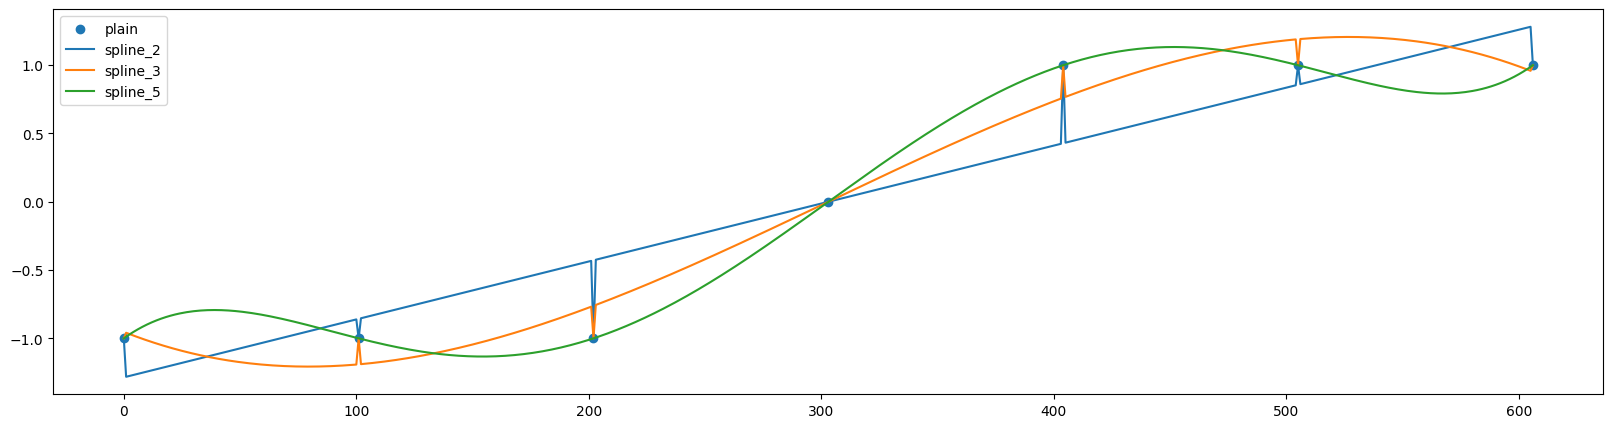

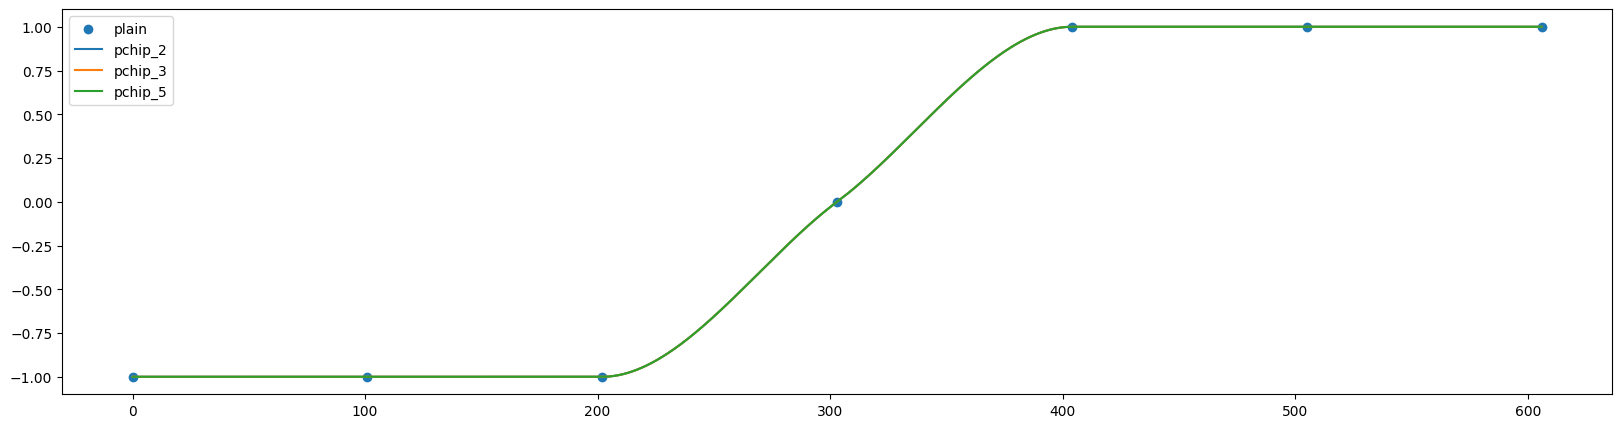

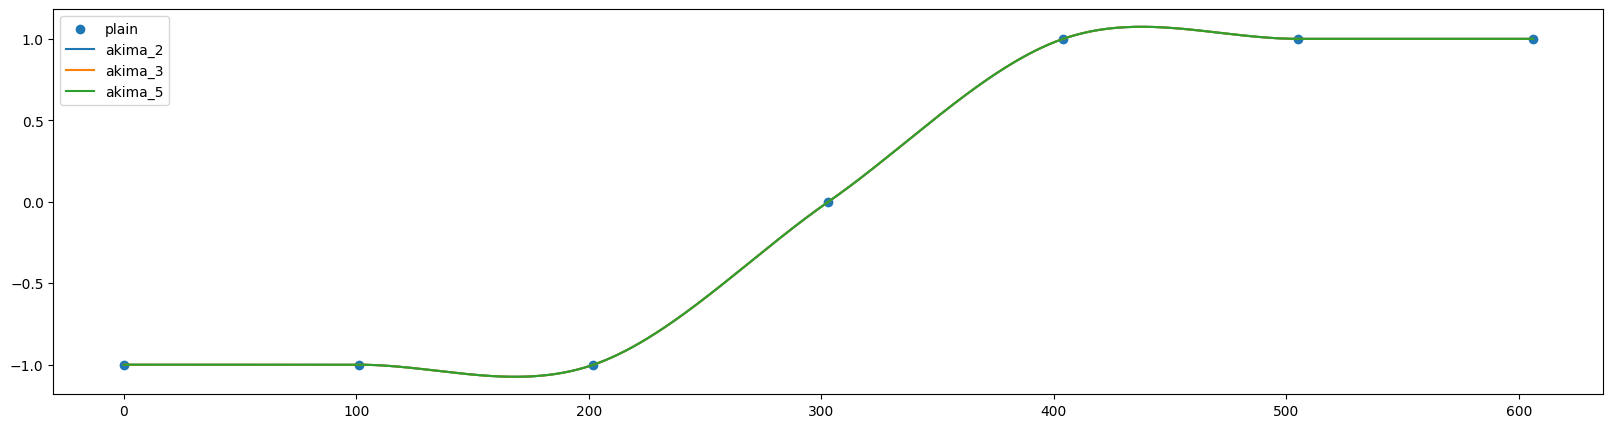

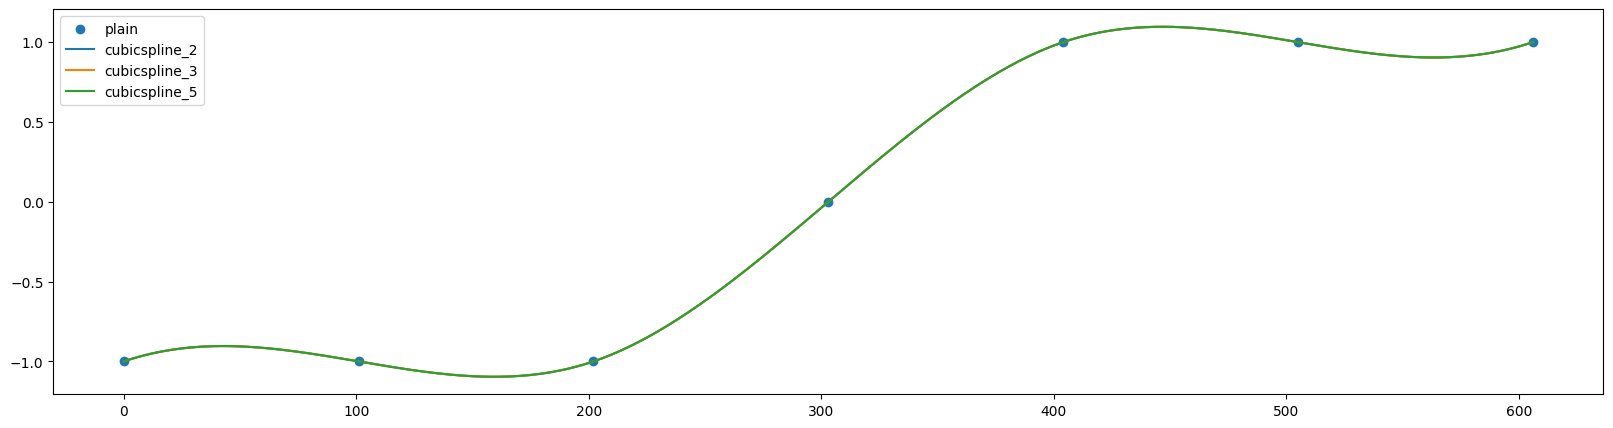

In [ ]:
na_list = [np.nan] * 100
test_ts = pd.Series([-1] + na_list + [-1] + na_list + [-1] + na_list + [0] + na_list + [1]+ na_list + [1] + na_list + [1])

plt.figure(figsize=(20,5))
plt.scatter(test_ts.index, test_ts, label = "plain")
plt.plot(test_ts.index, test_ts.interpolate(method = "linear"), label = "linear")
plt.show()

for method in ['nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'polynomial']:
    plt.figure(figsize=(20,5))
    plt.scatter(test_ts.index, test_ts, label = "plain")
    for d in [2,3,5]:
        plt.plot(test_ts.index, test_ts.interpolate(method = method, order = d), label = method + "_" + str(d))
    plt.legend()
    plt.show()

for method in ['krogh', 'piecewise_polynomial', 'spline', 'pchip', 'akima', 'cubicspline']:
    plt.figure(figsize=(20,5))
    plt.scatter(test_ts.index, test_ts, label = "plain")
    for d in [2,3,5]:
        plt.plot(test_ts.index, test_ts.interpolate(method = method, order = d), label = method + "_" + str(d))
    plt.legend()
    plt.show()

# plt.figure(figsize=(20,5))
# for d in [2,3,5]:
#     plt.plot(test_ts.index, test_ts.interpolate(method = "spline", order = d), label = "spline_" + str(d))
# plt.legend()
# plt.show()



C:\Users\EU10698\AppData\Local\Temp\ipykernel_24748\3276476617.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_temp.index = pd.to_datetime(df_all.index).values


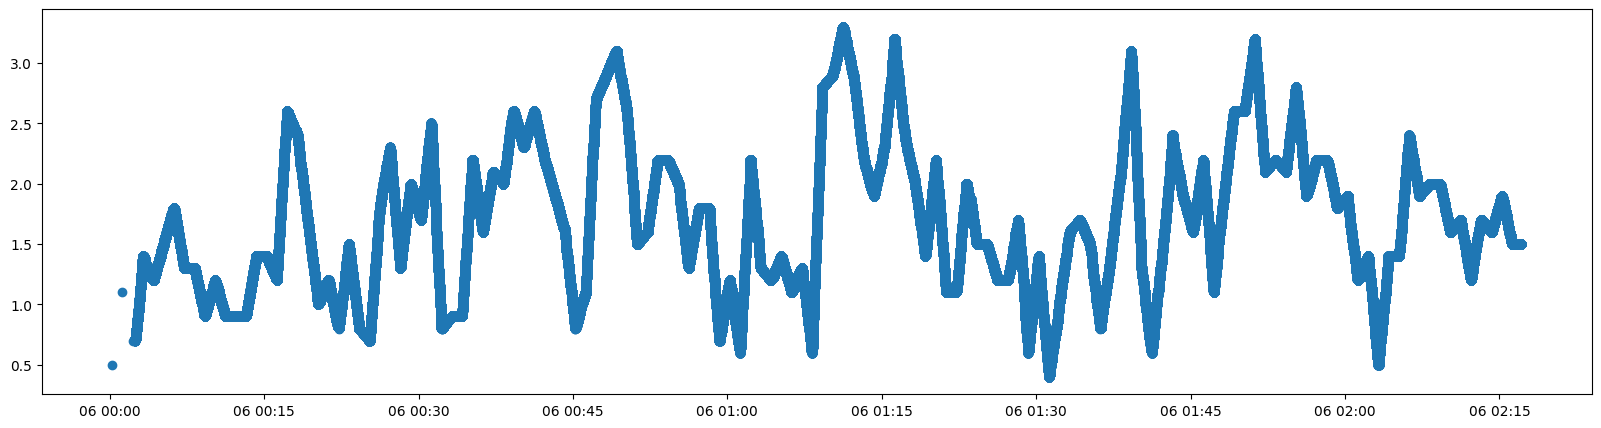

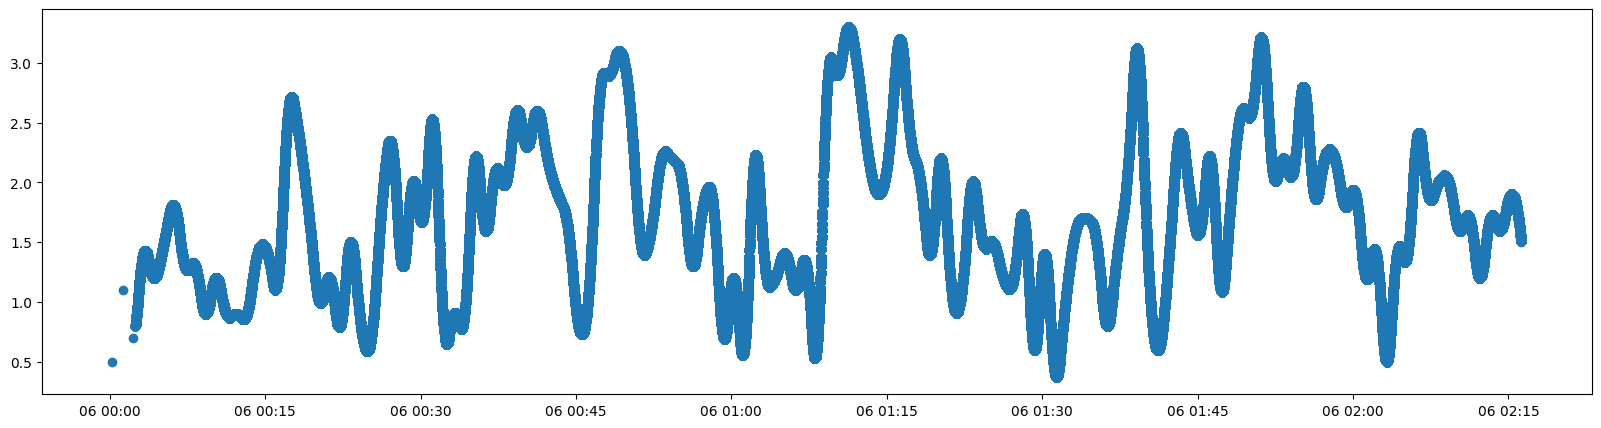

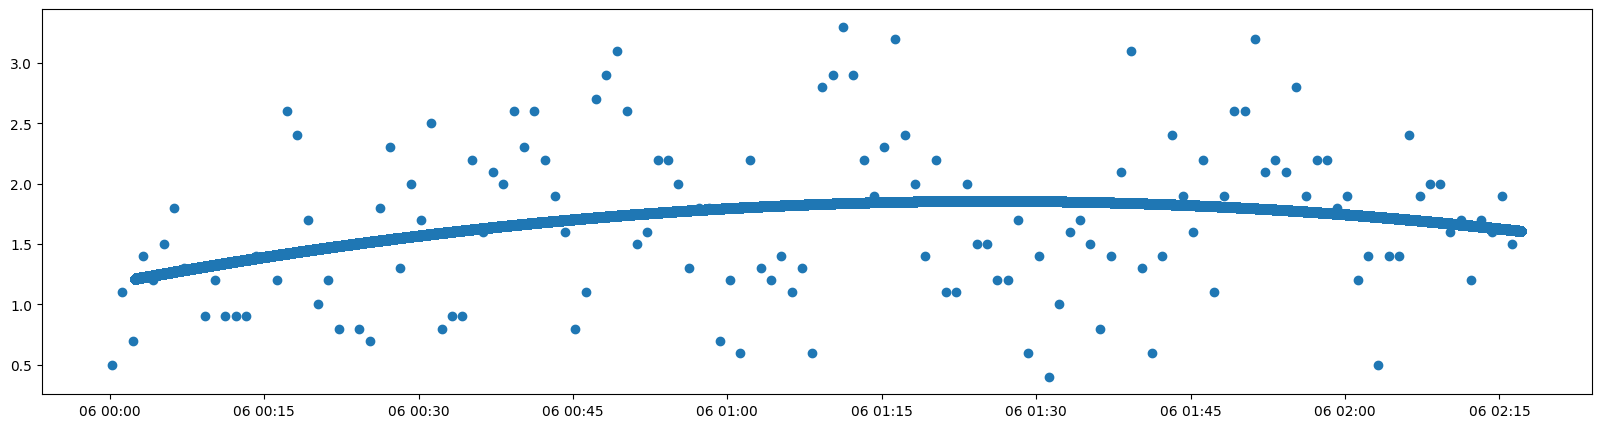

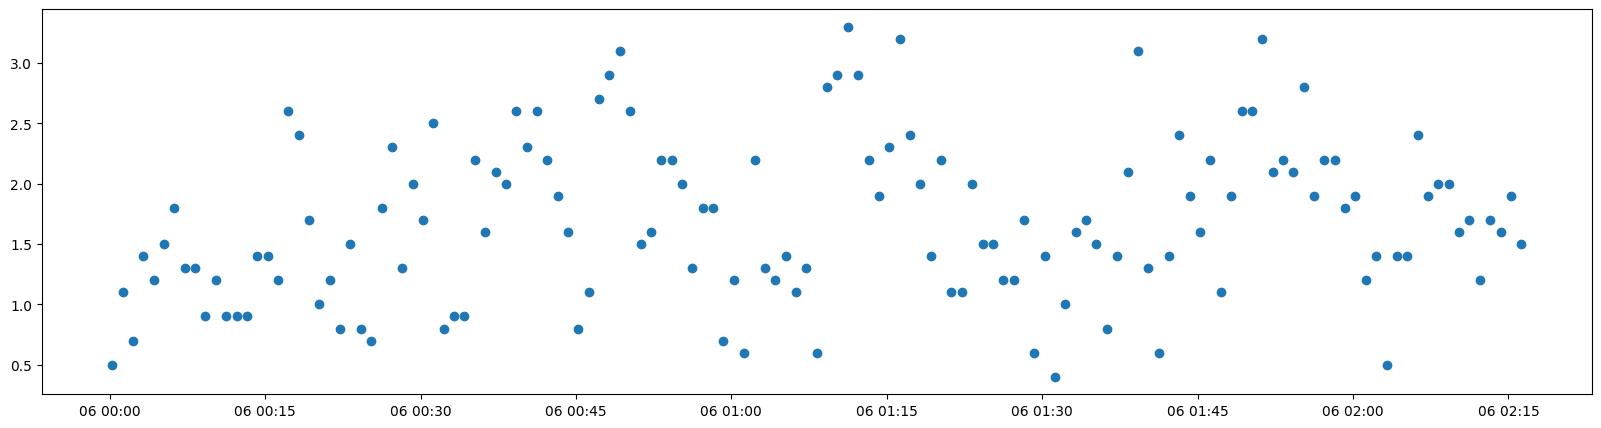

In [62]:
df_temp = df_all.copy()
df_temp.index = pd.to_datetime(df_all.index).values

plt.figure(figsize=(20,5))
plt.scatter(df_temp.index, df_temp["WindSpeed"].astype(float).interpolate(method = "linear"), label = "linear")
plt.show()

plt.figure(figsize=(20,5))
plt.scatter(df_temp.index, df_temp["WindSpeed"].astype(float).interpolate(method = "polynomial", order = 2), label = "polynomial")
plt.show()

plt.figure(figsize=(20,5))
plt.scatter(df_temp.index, df_temp["WindSpeed"].astype(float).interpolate(method = "spline", order = 2), label = "spline")
plt.show()

plt.figure(figsize=(20,5))
plt.scatter(df_temp.index, df_temp["WindSpeed"].astype(float), label = "plain")
plt.show()



In [90]:
len(df_temp)
df_viz

,index,WindSpeed
500000,2025-01-06 00:30:02.591,1.646693
500001,2025-01-06 00:30:02.591,1.646693
500002,2025-01-06 00:30:02.591,1.646693
500003,2025-01-06 00:30:02.591,1.646693
500004,2025-01-06 00:30:02.591,1.646693
...,...,...
999995,2025-01-06 00:57:43.276,2.143024
999996,2025-01-06 00:57:43.276,2.143024
999997,2025-01-06 00:57:43.276,2.143024
999998,2025-01-06 00:57:43.276,2.143024


2


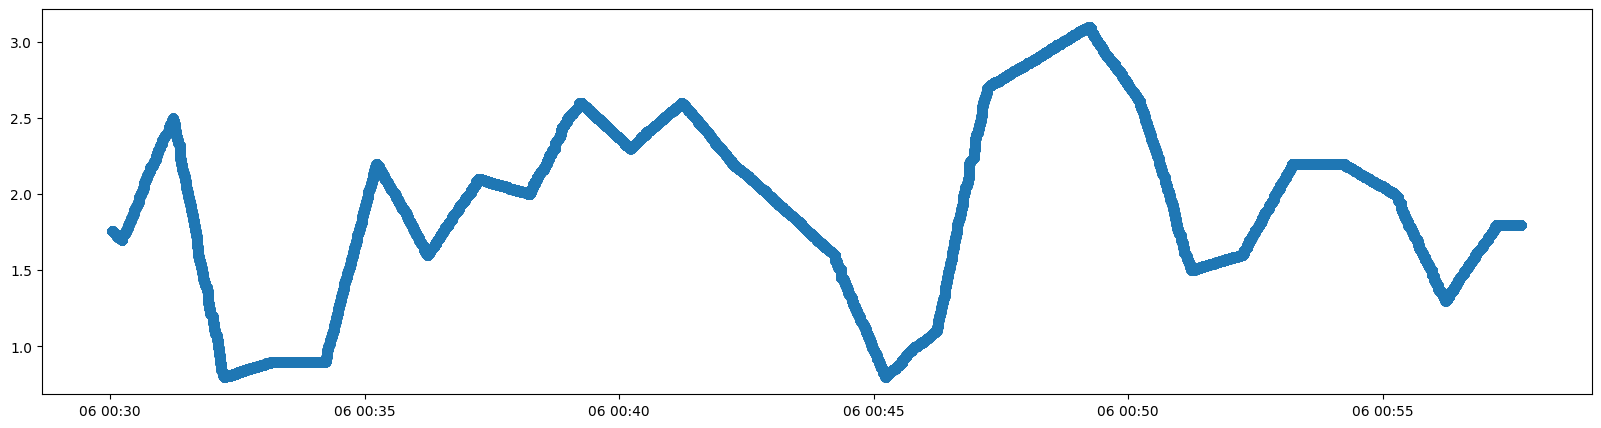

3


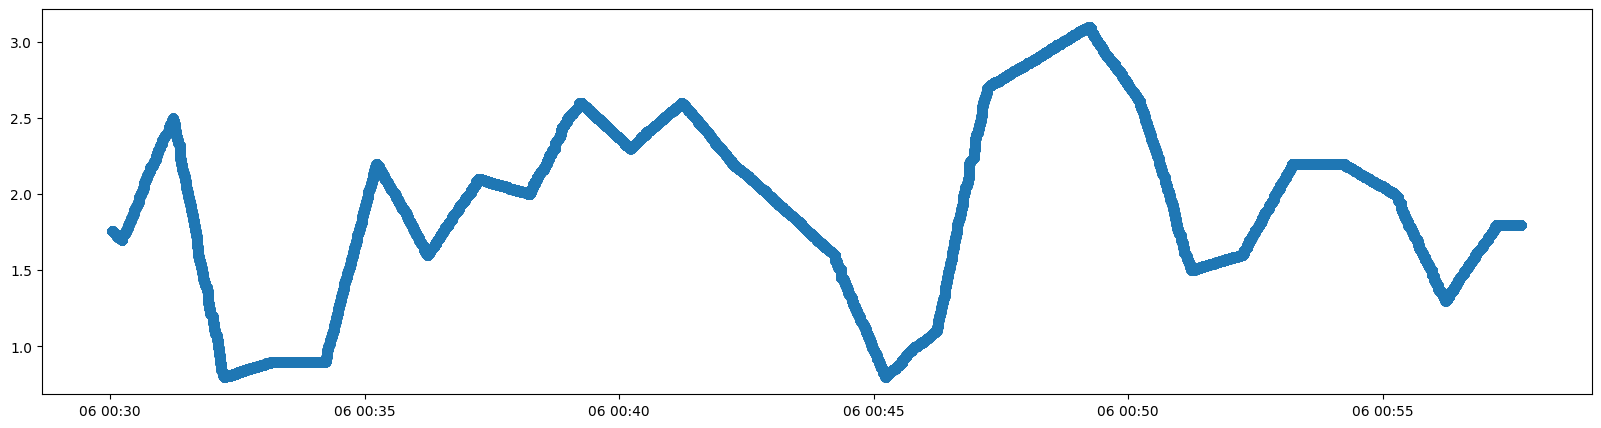

5


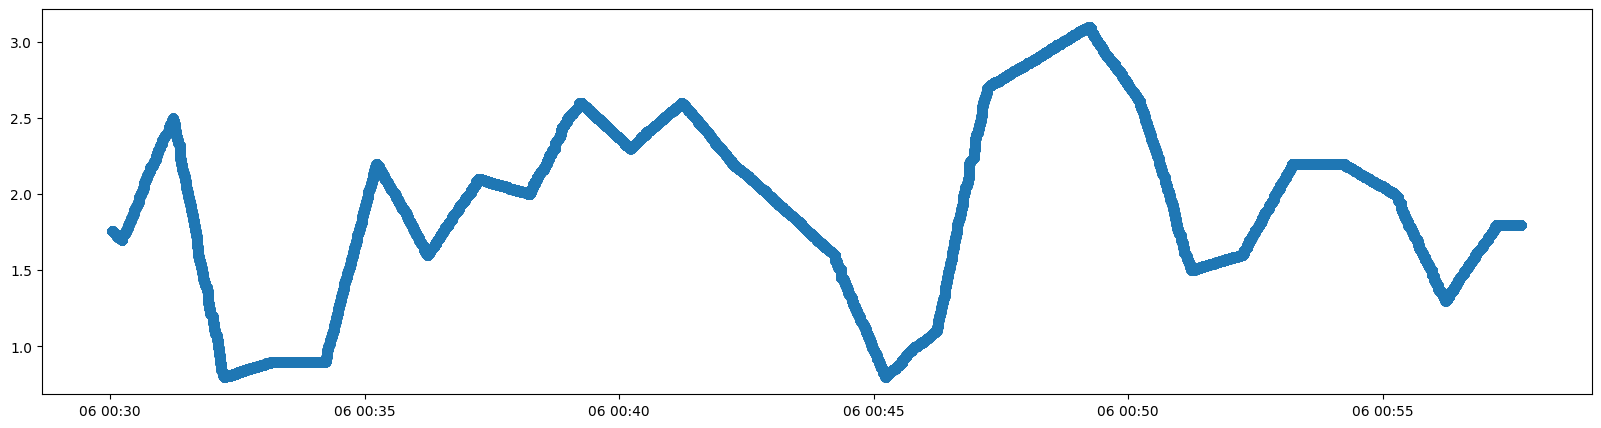

7


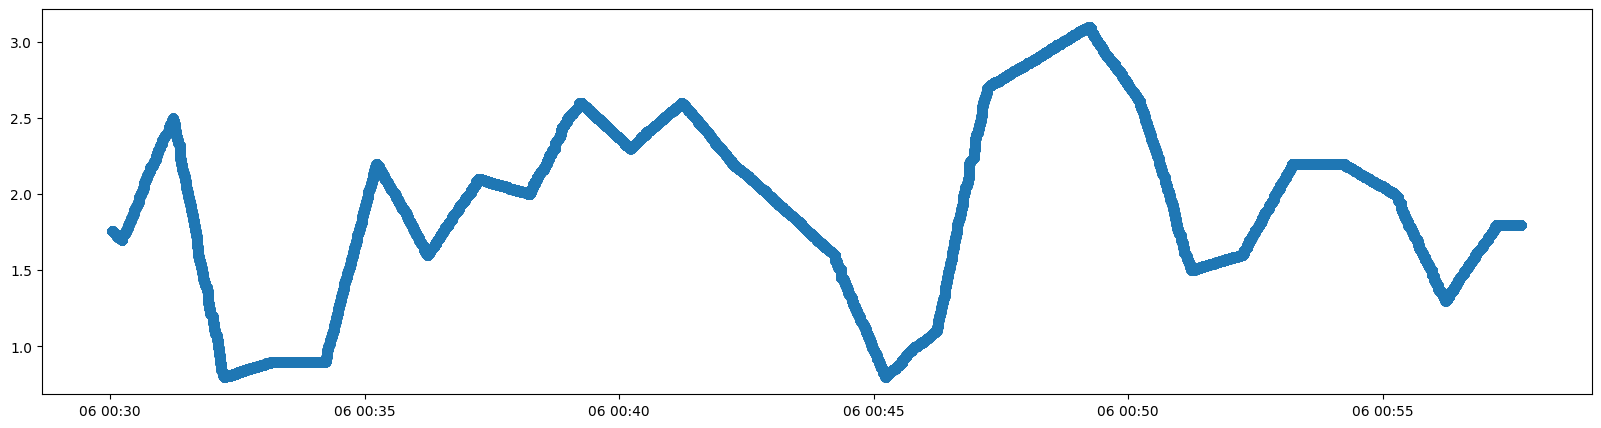

9


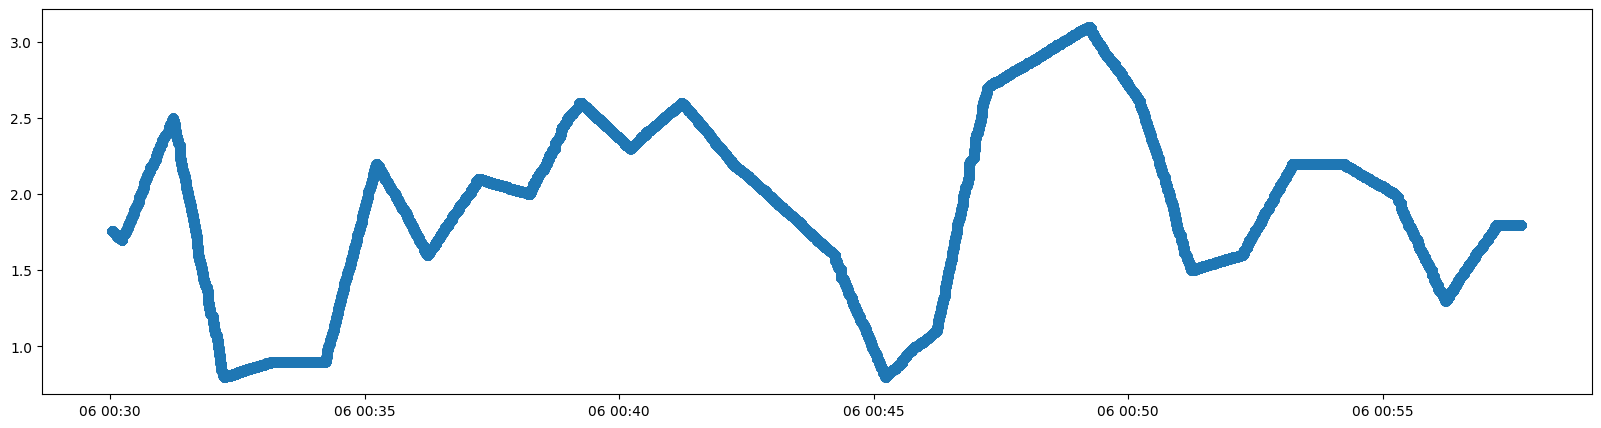

15


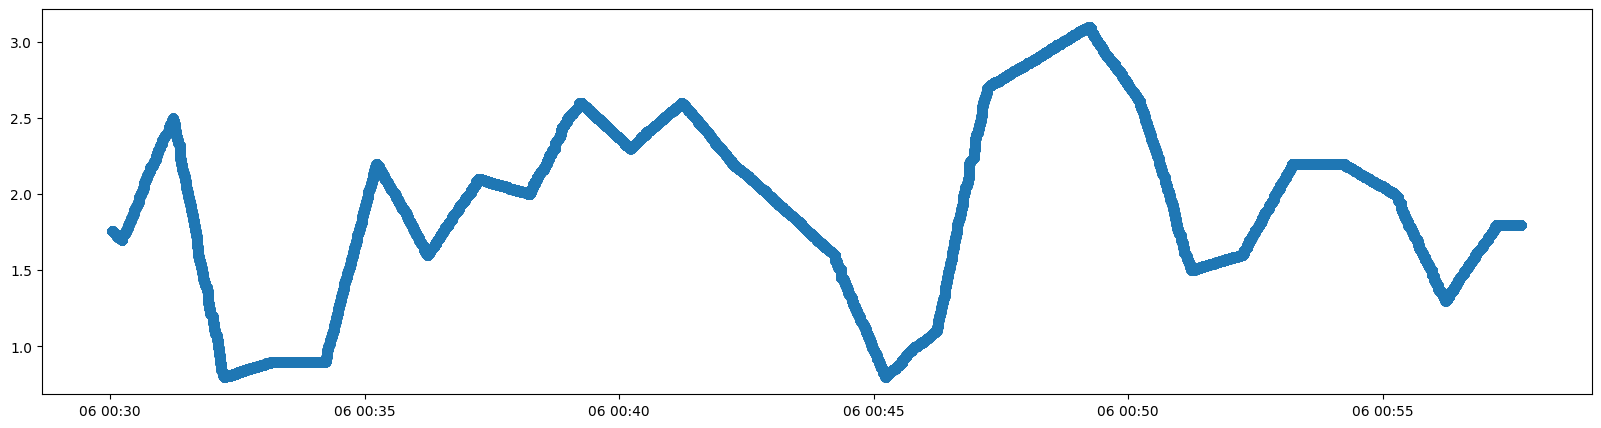

25


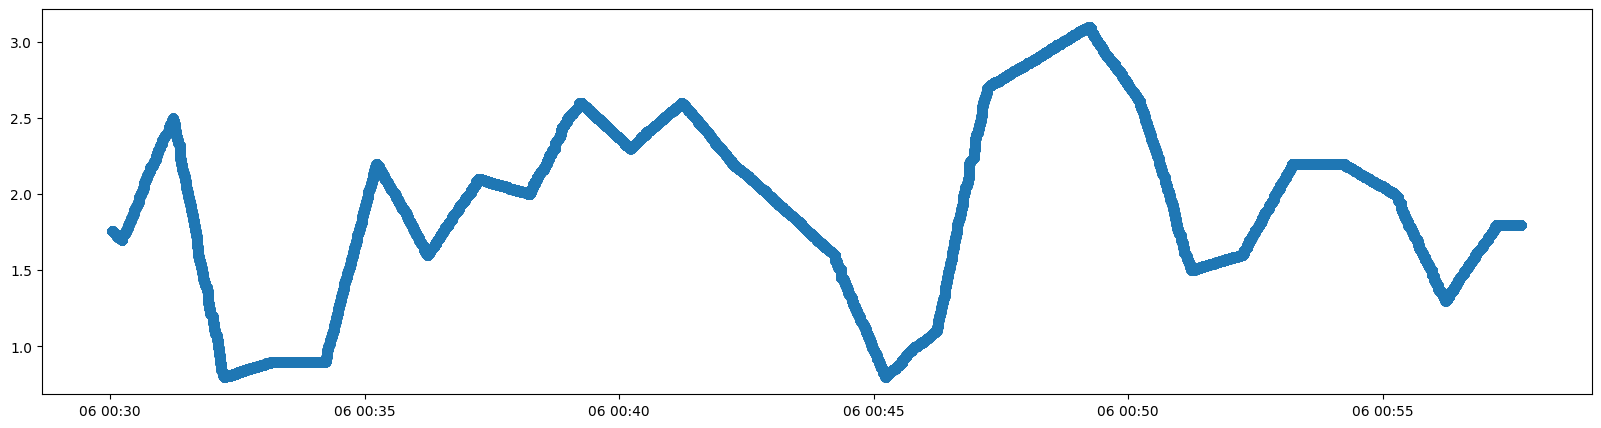

35


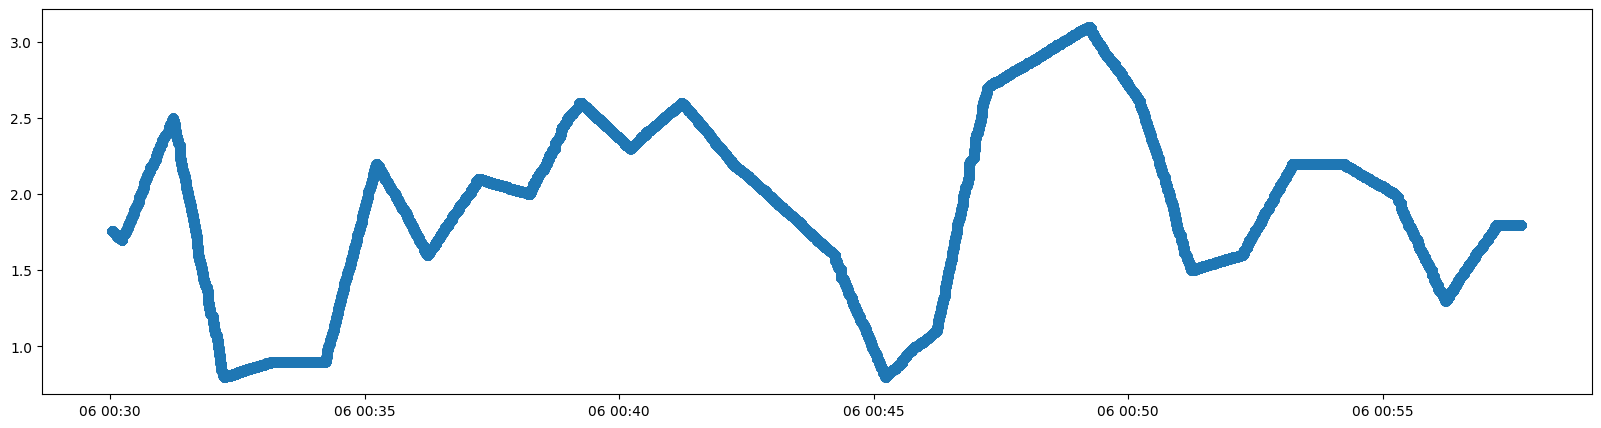

In [93]:
for d in [2,3,5,7,9,15,25,35]:
    try:
        df_viz = df_temp["WindSpeed"].astype(float).interpolate(method = "linear", order = d, limit_direction="both").reset_index().iloc[500000:1000000]
        print(d)
        plt.figure(figsize=(20,5))
        plt.scatter(df_viz["index"], df_viz["WindSpeed"], label = str(d))
        plt.show()
    except:
        pass

In [30]:
df_all.reset_index()[~df_all.reset_index()["AirTemp"].isnull()]

,timestamp,hour,min,sec,DriverNo,SessionKey,Utc,rpm,speed,n_gear,...,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,min_w_,hour_w_,sec_w_
0,00:00:14.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,52.0,978.1,0,42.1,217,0.5,0.0,0.0,14.0
1,00:01:14.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.6,53.0,978.0,0,42.1,0,1.1,1.0,0.0,14.0
2,00:02:14.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.6,52.0,978.0,0,42.2,284,0.7,2.0,0.0,14.0
13163,00:03:14.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.7,51.0,978.1,0,42.0,244,1.4,3.0,0.0,14.0
29804,00:04:14.057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.7,51.0,978.1,0,41.1,13,1.2,4.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373112,02:12:14.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.6,48.0,978.0,0,42.3,343,1.2,12.0,2.0,14.0
2392053,02:13:14.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.5,48.0,978.1,0,42.5,2,1.7,13.0,2.0,14.0
2409754,02:14:14.523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.4,48.0,978.0,0,42.6,8,1.6,14.0,2.0,14.0
2426695,02:15:14.532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.4,48.0,978.1,0,42.9,352,1.9,15.0,2.0,14.0


In [31]:
df_all.reset_index().iloc[2373112-25:2373112+25]

,timestamp,hour,min,sec,DriverNo,SessionKey,Utc,rpm,speed,n_gear,...,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,min_w_,hour_w_,sec_w_
2373087,02:12:13.291,2.0,12.0,13.0,27,9574.0,2024-07-28T14:20:51.2688306Z,10883.0,269.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373088,02:12:13.291,2.0,12.0,13.0,31,9574.0,2024-07-28T14:20:51.2688306Z,11433.0,319.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373089,02:12:13.291,2.0,12.0,13.0,31,9574.0,2024-07-28T14:20:51.2688306Z,11433.0,319.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373090,02:12:13.291,2.0,12.0,13.0,31,9574.0,2024-07-28T14:20:51.2688306Z,11433.0,319.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373091,02:12:13.291,2.0,12.0,13.0,31,9574.0,2024-07-28T14:20:51.2688306Z,11433.0,319.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373092,02:12:13.291,2.0,12.0,13.0,44,9574.0,2024-07-28T14:20:51.2688306Z,8989.0,147.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373093,02:12:13.291,2.0,12.0,13.0,44,9574.0,2024-07-28T14:20:51.2688306Z,8989.0,147.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373094,02:12:13.291,2.0,12.0,13.0,44,9574.0,2024-07-28T14:20:51.2688306Z,8989.0,147.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373095,02:12:13.291,2.0,12.0,13.0,44,9574.0,2024-07-28T14:20:51.2688306Z,8989.0,147.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2373096,02:12:13.291,2.0,12.0,13.0,55,9574.0,2024-07-28T14:20:51.2688306Z,11775.0,294.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
import numpy as np

cols = df_weather.columns[2:]
df_all.loc[:,cols] = df_all.loc[:,cols].ffill()


In [10]:
df_all.dropna(subset="Channels").dtypes

hour             float64
min              float64
sec              float64
DriverNo          object
SessionKey       float64
Utc               object
Channels          object
SessionKey_      float64
timestamp_        object
Utc_              object
Status            object
X                float64
Y                float64
Z                float64
SessionKey_w_    float64
AirTemp           object
Humidity          object
Pressure          object
Rainfall          object
TrackTemp         object
WindDirection     object
WindSpeed         object
dtype: object

In [13]:
df_all

,hour,min,sec,DriverNo,SessionKey,Utc,rpm,speed,n_gear,throttle,...,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,min_w_,hour_w_,sec_w_
timestamp,,,,,,,,,,,,,,,,,,,,,
00:00:14.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,52.0,978.1,0,42.1,217,0.5,0.0,0.0,14.0
00:01:14.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.6,53.0,978.0,0,42.1,0,1.1,1.0,0.0,14.0
00:02:14.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.6,52.0,978.0,0,42.2,284,0.7,2.0,0.0,14.0
00:02:28.746,0.0,2.0,28.0,1,9574.0,2024-07-28T12:11:06.7233441Z,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:02:28.746,0.0,2.0,28.0,1,9574.0,2024-07-28T12:11:06.7233441Z,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02:17:07.573,2.0,17.0,7.0,44,9574.0,2024-07-28T14:25:45.5501208Z,0.0,0.0,0.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02:17:07.573,2.0,17.0,7.0,55,9574.0,2024-07-28T14:25:45.5501208Z,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02:17:07.573,2.0,17.0,7.0,63,9574.0,2024-07-28T14:25:45.5501208Z,0.0,0.0,0.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
res = session.get_data(dataName="Weather_Data")
df_w = pd.DataFrame(res.value)

2024-12-20 23:35:37,633 : livef1 : INFO :: Getting requested data.
Selected session : 2024 Belgian Grand Prix Race
Topic : WeatherData
2024-12-20 23:35:37,866 : livef1 : INFO :: Data is successfully received.
2024-12-20 23:35:37,867 : livef1 : INFO :: Data is successfully parsed.


In [4]:
res = session.get_data(dataName="Track_Status")
df = pd.DataFrame(res.value)
# df["Utc"] = pd.to_datetime(df["Utc"])
# df["duration"] = df["Utc"] - df["Utc"].shift(1)
df

2024-12-18 14:04:31,772 : livef1 : INFO :: Getting requested data.
Selected session : 2024 Belgian Grand Prix Race
Topic : TrackStatus
2024-12-18 14:04:31,774 : livef1 : DEBUG :: Sending GET request to URL: https://livetiming.formula1.com/static/2024/2024-07-28_Belgian_Grand_Prix/2024-07-28_Race/TrackStatus.jsonStream
2024-12-18 14:04:32,567 : livef1 : DEBUG :: Successfully parsed streamed data.
2024-12-18 14:04:32,573 : livef1 : DEBUG :: Data has been get in 0.799 seconds
2024-12-18 14:04:32,577 : livef1 : INFO :: Data is successfully received.
2024-12-18 14:04:32,581 : livef1 : DEBUG :: Using parser function for title: TrackStatus
2024-12-18 14:04:32,584 : livef1 : DEBUG :: Parsing successful for title: TrackStatus
2024-12-18 14:04:32,590 : livef1 : DEBUG :: Data has been parsed in 0.009 seconds
2024-12-18 14:04:32,592 : livef1 : INFO :: Data is successfully parsed.


,SessionKey,timestamp,Status,Message
0,9574,00:00:00.000,2,Yellow
1,9574,00:03:45.413,1,AllClear
2,9574,01:22:18.736,2,Yellow
3,9574,01:22:20.200,1,AllClear


In [11]:
res = session.get_data(dataName="Tyre_Stints")
df = pd.DataFrame(res.value)
df

2024-12-18 14:33:11,148 : livef1 : INFO :: Getting requested data.
Selected session : 2024 Belgian Grand Prix Race
Topic : TyreStintSeries
2024-12-18 14:33:11,152 : livef1 : DEBUG :: Sending GET request to URL: https://livetiming.formula1.com/static/2024/2024-07-28_Belgian_Grand_Prix/2024-07-28_Race/TyreStintSeries.jsonStream
2024-12-18 14:33:12,082 : livef1 : DEBUG :: Successfully parsed streamed data.
2024-12-18 14:33:12,084 : livef1 : DEBUG :: Data has been get in 0.933 seconds
2024-12-18 14:33:12,086 : livef1 : INFO :: Data is successfully received.
2024-12-18 14:33:12,089 : livef1 : DEBUG :: Using parser function for title: TyreStintSeries
2024-12-18 14:33:12,092 : livef1 : DEBUG :: Parsing successful for title: TyreStintSeries
2024-12-18 14:33:12,098 : livef1 : DEBUG :: Data has been parsed in 0.009 seconds
2024-12-18 14:33:12,100 : livef1 : INFO :: Data is successfully parsed.


,session_key,timestamp,DriverNo,PitCount,Compound,New,TyresNotChanged,TotalLaps,StartLaps
0,9574,00:48:25.685,14,0,MEDIUM,true,0,0.0,0.0
1,9574,00:48:30.766,10,0,MEDIUM,true,0,0.0,0.0
2,9574,00:48:30.766,18,0,HARD,true,0,0.0,0.0
3,9574,00:48:30.766,20,0,MEDIUM,true,0,0.0,0.0
4,9574,00:48:30.766,22,0,MEDIUM,true,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
904,9574,02:16:36.516,3,3,SOFT,true,0,0.0,0.0
905,9574,02:16:41.529,2,2,NaN,NaN,NaN,20.0,NaN
906,9574,02:16:41.529,27,2,NaN,NaN,NaN,24.0,NaN
907,9574,02:16:46.512,18,2,MEDIUM,true,0,0.0,0.0


In [12]:
df

,session_key,timestamp,DriverNo,PitCount,Compound,New,TyresNotChanged,TotalLaps,StartLaps
0,9574,00:48:25.685,14,0,MEDIUM,true,0,0.0,0.0
1,9574,00:48:30.766,10,0,MEDIUM,true,0,0.0,0.0
2,9574,00:48:30.766,18,0,HARD,true,0,0.0,0.0
3,9574,00:48:30.766,20,0,MEDIUM,true,0,0.0,0.0
4,9574,00:48:30.766,22,0,MEDIUM,true,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
904,9574,02:16:36.516,3,3,SOFT,true,0,0.0,0.0
905,9574,02:16:41.529,2,2,NaN,NaN,NaN,20.0,NaN
906,9574,02:16:41.529,27,2,NaN,NaN,NaN,24.0,NaN
907,9574,02:16:46.512,18,2,MEDIUM,true,0,0.0,0.0


In [14]:
res = session.get_data(dataName="Weather_Data")
df = pd.DataFrame(res.value)
df

2024-12-18 14:35:30,129 : livef1 : INFO :: Getting requested data.
Selected session : 2024 Belgian Grand Prix Race
Topic : WeatherData
2024-12-18 14:35:30,130 : livef1 : DEBUG :: Sending GET request to URL: https://livetiming.formula1.com/static/2024/2024-07-28_Belgian_Grand_Prix/2024-07-28_Race/WeatherData.jsonStream
2024-12-18 14:35:30,969 : livef1 : DEBUG :: Successfully parsed streamed data.
2024-12-18 14:35:30,972 : livef1 : DEBUG :: Data has been get in 0.842 seconds
2024-12-18 14:35:30,974 : livef1 : INFO :: Data is successfully received.
2024-12-18 14:35:30,977 : livef1 : DEBUG :: Using parser function for title: WeatherData
2024-12-18 14:35:30,980 : livef1 : DEBUG :: Parsing successful for title: WeatherData
2024-12-18 14:35:30,982 : livef1 : DEBUG :: Data has been parsed in 0.005 seconds
2024-12-18 14:35:30,984 : livef1 : INFO :: Data is successfully parsed.


,SessionKey,timestamp,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,9574,00:00:14.052,21.0,52.0,978.1,0,42.1,217,0.5
1,9574,00:01:14.050,20.6,53.0,978.0,0,42.1,0,1.1
2,9574,00:02:14.047,20.6,52.0,978.0,0,42.2,284,0.7
3,9574,00:03:14.053,20.7,51.0,978.1,0,42.0,244,1.4
4,9574,00:04:14.057,20.7,51.0,978.1,0,41.1,13,1.2
...,...,...,...,...,...,...,...,...,...
132,9574,02:12:14.511,21.6,48.0,978.0,0,42.3,343,1.2
133,9574,02:13:14.530,21.5,48.0,978.1,0,42.5,2,1.7
134,9574,02:14:14.523,21.4,48.0,978.0,0,42.6,8,1.6
135,9574,02:15:14.532,21.4,48.0,978.1,0,42.9,352,1.9


In [9]:
from livef1.adapters.livetimingf1_adapter import livetimingF1_getdata

data = livetimingF1_getdata("https://livetiming.formula1.com/static/2024/2024-07-28_Belgian_Grand_Prix/2024-07-28_Race/PitLaneTimeCollection.jsonStream", stream=True)
data

for key, value in data.items():
    if "_deleted" in value["PitTimes"].keys():
        for deleted_driver in value["PitTimes"]["_deleted"]:
            record = {
                "session_key": 0,
                "timestamp": key,
                "_deleted": deleted_driver
            }
            print(record)
            
    else:
        for driver_no, info in value["PitTimes"].items():
            print(info)
            record = {
                "session_key": 0,
                "timestamp": key,
                **info
            }
            print(record)
    
    print("----------")

2024-12-18 16:28:10,922 : livef1 : DEBUG :: Sending GET request to URL: https://livetiming.formula1.com/static/2024/2024-07-28_Belgian_Grand_Prix/2024-07-28_Race/PitLaneTimeCollection.jsonStream
2024-12-18 16:28:11,722 : livef1 : DEBUG :: Successfully parsed streamed data.


{'RacingNumber': '27', 'Duration': '23.5', 'Lap': '7'}
{'session_key': 0, 'timestamp': '01:08:46.647', 'RacingNumber': '27', 'Duration': '23.5', 'Lap': '7'}
----------
{'session_key': 0, 'timestamp': '01:09:13.025', '_deleted': '27'}
----------
{'RacingNumber': '23', 'Duration': '23.6', 'Lap': '8'}
{'session_key': 0, 'timestamp': '01:10:32.083', 'RacingNumber': '23', 'Duration': '23.6', 'Lap': '8'}
----------
{'RacingNumber': '3', 'Duration': '22.6', 'Lap': '8'}
{'session_key': 0, 'timestamp': '01:10:34.930', 'RacingNumber': '3', 'Duration': '22.6', 'Lap': '8'}
----------
{'RacingNumber': '2', 'Duration': '23.3', 'Lap': '8'}
{'session_key': 0, 'timestamp': '01:10:41.051', 'RacingNumber': '2', 'Duration': '23.3', 'Lap': '8'}
----------
{'session_key': 0, 'timestamp': '01:10:58.533', '_deleted': '23'}
----------
{'session_key': 0, 'timestamp': '01:11:01.381', '_deleted': '3'}
----------
{'session_key': 0, 'timestamp': '01:11:07.621', '_deleted': '2'}
----------
{'RacingNumber': '10', 'Du

In [10]:
res = session.get_data(dataName="Pit_Lane_Times")
df = pd.DataFrame(res.value)
df

2024-12-19 09:45:39,708 : livef1 : INFO :: Getting requested data.
Selected session : 2024 Belgian Grand Prix Race
Topic : PitLaneTimeCollection
2024-12-19 09:45:39,741 : livef1 : DEBUG :: Sending GET request to URL: https://livetiming.formula1.com/static/2024/2024-07-28_Belgian_Grand_Prix/2024-07-28_Race/PitLaneTimeCollection.jsonStream
2024-12-19 09:45:40,799 : livef1 : DEBUG :: Successfully parsed streamed data.
2024-12-19 09:45:40,802 : livef1 : DEBUG :: Data has been get in 1.071 seconds
2024-12-19 09:45:40,809 : livef1 : INFO :: Data is successfully received.
2024-12-19 09:45:40,812 : livef1 : DEBUG :: Using parser function for title: PitLaneTimeCollection
2024-12-19 09:45:40,816 : livef1 : DEBUG :: Parsing successful for title: PitLaneTimeCollection
2024-12-19 09:45:40,818 : livef1 : DEBUG :: Data has been parsed in 0.006 seconds
2024-12-19 09:45:40,821 : livef1 : INFO :: Data is successfully parsed.


,session_key,timestamp,27,_deleted,23,3,2,10,63,1,...,81,77,16,31,18,14,4,22,20,55
0,9574,01:08:46.647,"{'RacingNumber': '27', 'Duration': '23.5', 'La...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9574,01:09:13.025,NaN,[27],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9574,01:10:32.083,NaN,NaN,"{'RacingNumber': '23', 'Duration': '23.6', 'La...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9574,01:10:34.930,NaN,NaN,NaN,"{'RacingNumber': '3', 'Duration': '22.6', 'Lap...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9574,01:10:41.051,NaN,NaN,NaN,NaN,"{'RacingNumber': '2', 'Duration': '23.3', 'Lap...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,9574,01:51:26.791,NaN,[31],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,9574,02:00:16.745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'RacingNumber': '77', 'Duration': '22.9', 'La...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,9574,02:00:43.044,NaN,[77],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,9574,02:12:25.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import fastf1

session = fastf1.get_session(2024, 'Belgian', 'Race')
session.load()

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '81', '16', '1', '4', '55', '11', '14', '31', '3', '18', '23', '10', '20', '77', '22', '2', '27', '24', '63']


In [24]:
help(session)

Help on Session in module fastf1.core object:

class Session(builtins.object)
 |  Session(event, session_name, f1_api_support=False)
 |  
 |  Object for accessing session specific data.
 |  
 |  The session class will usually be your starting point. This object will
 |  have various information about the session.
 |  
 |  .. note:: Most of the data is only available after calling
 |      :func:`Session.load`
 |  
 |  Methods defined here:
 |  
 |  __init__(self, event, session_name, f1_api_support=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  get_circuit_info(self) -> Optional[fastf1.mvapi.data.CircuitInfo]
 |      Returns additional information about the circuit that hosts this
 |      event.
 |      
 |      This information includes the location of corners, marshal lights,
 |      marshal sectors and the rotation of the track map. Note that the data
 |      is manually created and therefore n

In [2]:
session.weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:14.052000,21.0,52.0,978.1,False,42.1,217,0.5
1,0 days 00:01:14.050000,20.6,53.0,978.0,False,42.1,0,1.1
2,0 days 00:02:14.047000,20.6,52.0,978.0,False,42.2,284,0.7
3,0 days 00:03:14.053000,20.7,51.0,978.1,False,42.0,244,1.4
4,0 days 00:04:14.057000,20.7,51.0,978.1,False,41.1,13,1.2
...,...,...,...,...,...,...,...,...
132,0 days 02:12:14.511000,21.6,48.0,978.0,False,42.3,343,1.2
133,0 days 02:13:14.530000,21.5,48.0,978.1,False,42.5,2,1.7
134,0 days 02:14:14.523000,21.4,48.0,978.0,False,42.6,8,1.6
135,0 days 02:15:14.532000,21.4,48.0,978.1,False,42.9,352,1.9


In [3]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:07.801000,HAM,44,0 days 00:01:52.700000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.406000,...,True,Mercedes,0 days 00:55:14.764000,2024-07-28 13:03:52.742,1,2.0,False,,False,False
1,0 days 00:58:57.650000,HAM,44,0 days 00:01:49.849000,2.0,1.0,NaT,NaT,0 days 00:00:31.284000,0 days 00:00:49.211000,...,True,Mercedes,0 days 00:57:07.801000,2024-07-28 13:05:45.779,1,2.0,False,,False,True
2,0 days 01:00:46.759000,HAM,44,0 days 00:01:49.109000,3.0,1.0,NaT,NaT,0 days 00:00:31.215000,0 days 00:00:48.486000,...,True,Mercedes,0 days 00:58:57.650000,2024-07-28 13:07:35.628,1,1.0,False,,False,True
3,0 days 01:02:36.567000,HAM,44,0 days 00:01:49.808000,4.0,1.0,NaT,NaT,0 days 00:00:31.754000,0 days 00:00:48.605000,...,True,Mercedes,0 days 01:00:46.759000,2024-07-28 13:09:24.737,1,1.0,False,,False,True
4,0 days 01:04:25.943000,HAM,44,0 days 00:01:49.376000,5.0,1.0,NaT,NaT,0 days 00:00:31.592000,0 days 00:00:48.320000,...,True,Mercedes,0 days 01:02:36.567000,2024-07-28 13:11:14.545,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,0 days 02:08:02.508000,RUS,63,0 days 00:01:47.631000,40.0,2.0,NaT,NaT,0 days 00:00:30.989000,0 days 00:00:47.555000,...,True,Mercedes,0 days 02:06:14.877000,2024-07-28 14:14:52.855,1,1.0,False,,False,True
837,0 days 02:09:50.262000,RUS,63,0 days 00:01:47.754000,41.0,2.0,NaT,NaT,0 days 00:00:30.926000,0 days 00:00:47.796000,...,True,Mercedes,0 days 02:08:02.508000,2024-07-28 14:16:40.486,1,1.0,False,,False,True
838,0 days 02:11:37.727000,RUS,63,0 days 00:01:47.465000,42.0,2.0,NaT,NaT,0 days 00:00:31.014000,0 days 00:00:47.525000,...,True,Mercedes,0 days 02:09:50.262000,2024-07-28 14:18:28.240,1,1.0,False,,False,True
839,0 days 02:13:25.028000,RUS,63,0 days 00:01:47.301000,43.0,2.0,NaT,NaT,0 days 00:00:30.990000,0 days 00:00:47.479000,...,True,Mercedes,0 days 02:11:37.727000,2024-07-28 14:20:15.705,1,1.0,False,,False,True


In [25]:
session.laps[~session.laps["PitInTime"].isnull()].sort_values("Time")

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
796,0 days 01:06:15.500000,ZHO,24,0 days 00:02:13.633000,5.0,1.0,NaT,0 days 01:06:10.005000,0 days 00:00:32.293000,0 days 00:00:54.900000,...,True,Kick Sauber,0 days 01:04:01.867000,2024-07-28 13:12:39.845,1,20.0,False,,False,False
754,0 days 01:08:26.770000,HUL,27,0 days 00:01:55.520000,7.0,1.0,NaT,0 days 01:08:23.041000,0 days 00:00:31.418000,0 days 00:00:50.197000,...,True,Haas F1 Team,0 days 01:06:31.250000,2024-07-28 13:15:09.228,1,19.0,False,,False,False
491,0 days 01:10:12.236000,ALB,23,0 days 00:01:55.365000,8.0,1.0,NaT,0 days 01:10:08.481000,0 days 00:00:31.586000,0 days 00:00:50.028000,...,True,Williams,0 days 01:08:16.871000,2024-07-28 13:16:54.849,1,13.0,False,,False,False
403,0 days 01:10:15.987000,RIC,3,0 days 00:01:55.595000,8.0,1.0,NaT,0 days 01:10:12.248000,0 days 00:00:31.294000,0 days 00:00:50.321000,...,True,RB,0 days 01:08:20.392000,2024-07-28 13:16:58.370,1,17.0,False,,False,False
711,0 days 01:10:21.412000,SAR,2,0 days 00:01:55.636000,8.0,1.0,NaT,0 days 01:10:17.618000,0 days 00:00:31.514000,0 days 00:00:50.196000,...,True,Williams,0 days 01:08:25.776000,2024-07-28 13:17:03.754,1,18.0,False,,False,False
536,0 days 01:12:06.218000,GAS,10,0 days 00:01:56.010000,9.0,1.0,NaT,0 days 01:12:02.376000,0 days 00:00:31.604000,0 days 00:00:50.421000,...,True,Alpine,0 days 01:10:10.208000,2024-07-28 13:18:48.186,1,14.0,False,,False,False
806,0 days 01:13:45.622000,RUS,63,0 days 00:01:54.652000,10.0,1.0,NaT,0 days 01:13:41.725000,0 days 00:00:31.288000,0 days 00:00:49.521000,...,True,Mercedes,0 days 01:11:50.970000,2024-07-28 13:20:28.948,1,7.0,False,,False,False
141,0 days 01:13:48.023000,VER,1,0 days 00:01:54.655000,10.0,1.0,NaT,0 days 01:13:44.188000,0 days 00:00:31.005000,0 days 00:00:49.825000,...,True,Red Bull Racing,0 days 01:11:53.368000,2024-07-28 13:20:31.346,1,8.0,False,,False,False
10,0 days 01:15:28.349000,HAM,44,0 days 00:01:54.328000,11.0,1.0,NaT,0 days 01:15:24.524000,0 days 00:00:31.618000,0 days 00:00:48.726000,...,True,Mercedes,0 days 01:13:34.021000,2024-07-28 13:22:11.999,1,2.0,False,,False,False
274,0 days 01:15:33.314000,PER,11,0 days 00:01:54.844000,11.0,1.0,NaT,0 days 01:15:29.327000,0 days 00:00:31.528000,0 days 00:00:49.036000,...,True,Red Bull Racing,0 days 01:13:38.470000,2024-07-28 13:22:16.448,1,5.0,False,,False,False


In [27]:
session.laps[~session.laps["PitOutTime"].isnull()].sort_values("Time")

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
755,0 days 01:10:31.585000,HUL,27,0 days 00:02:04.815000,8.0,2.0,0 days 01:08:46.598000,NaT,0 days 00:00:46.189000,0 days 00:00:49.360000,...,True,Haas F1 Team,0 days 01:08:26.770000,2024-07-28 13:17:04.748,1,19.0,False,,False,False
492,0 days 01:12:15.427000,ALB,23,0 days 00:02:03.191000,9.0,2.0,0 days 01:10:31.974000,NaT,0 days 00:00:46.125000,0 days 00:00:47.911000,...,True,Williams,0 days 01:10:12.236000,2024-07-28 13:18:50.214,1,16.0,False,,False,False
404,0 days 01:12:19.006000,RIC,3,0 days 00:02:03.019000,9.0,2.0,0 days 01:10:34.905000,NaT,0 days 00:00:45.329000,0 days 00:00:48.402000,...,True,RB,0 days 01:10:15.987000,2024-07-28 13:18:53.965,1,17.0,False,,False,False
712,0 days 01:12:25.298000,SAR,2,0 days 00:02:03.886000,9.0,2.0,0 days 01:10:40.885000,NaT,0 days 00:00:46.046000,0 days 00:00:48.456000,...,True,Williams,0 days 01:10:21.412000,2024-07-28 13:18:59.390,1,19.0,False,,False,False
537,0 days 01:14:11.044000,GAS,10,0 days 00:02:04.826000,10.0,2.0,0 days 01:12:25.393000,NaT,0 days 00:00:45.688000,0 days 00:00:50.009000,...,True,Alpine,0 days 01:12:06.218000,2024-07-28 13:20:44.196,1,18.0,False,,False,False
807,0 days 01:15:48.078000,RUS,63,0 days 00:02:02.456000,11.0,2.0,0 days 01:14:04.409000,NaT,0 days 00:00:44.917000,0 days 00:00:48.672000,...,True,Mercedes,0 days 01:13:45.622000,2024-07-28 13:22:23.600,1,10.0,False,,False,False
142,0 days 01:15:50.812000,VER,1,0 days 00:02:02.789000,11.0,2.0,0 days 01:14:07.325000,NaT,0 days 00:00:45.573000,0 days 00:00:48.109000,...,True,Red Bull Racing,0 days 01:13:48.023000,2024-07-28 13:22:26.001,1,13.0,False,,False,False
11,0 days 01:17:33.141000,HAM,44,0 days 00:02:04.792000,12.0,2.0,0 days 01:15:47.722000,NaT,0 days 00:00:46.008000,0 days 00:00:49.504000,...,True,Mercedes,0 days 01:15:28.349000,2024-07-28 13:24:06.327,1,5.0,False,,False,False
275,0 days 01:17:37.018000,PER,11,0 days 00:02:03.704000,12.0,2.0,0 days 01:15:51.964000,NaT,0 days 00:00:44.973000,0 days 00:00:49.368000,...,True,Red Bull Racing,0 days 01:15:33.314000,2024-07-28 13:24:11.292,1,6.0,False,,False,False
55,0 days 01:17:37.371000,PIA,81,0 days 00:02:03.103000,12.0,2.0,0 days 01:15:53.197000,NaT,0 days 00:00:44.535000,0 days 00:00:49.179000,...,True,McLaren,0 days 01:15:34.268000,2024-07-28 13:24:12.246,1,7.0,False,,False,False


In [37]:
session.race_control_messages

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber,Lap
0,2024-07-27 13:46:34,Other,CHANGE IN CLIMATIC CONDITIONS,None,None,None,NaN,None,None
1,2024-07-27 13:47:10,Other,WET TRACK,None,None,None,NaN,None,None
2,2024-07-27 13:47:13,Other,LOW GRIP CONDITIONS,None,None,None,NaN,None,None
3,2024-07-27 13:59:01,Drs,DRS DISABLED,DISABLED,None,None,NaN,None,None
4,2024-07-27 14:00:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
5,2024-07-27 14:16:11,Other,TURN 18 INCIDENT INVOLVING CARS 24 (ZHO) AND 1...,None,None,None,NaN,None,None
6,2024-07-27 14:17:11,Other,FIA STEWARDS: TURN 18 INCIDENT INVOLVING CARS ...,None,None,None,NaN,None,None
7,2024-07-27 14:18:00,Flag,CHEQUERED FLAG,None,CHEQUERED,Track,NaN,None,None
8,2024-07-27 14:18:01,Other,CAR 2 (SAR) TIME 2:41.426 DELETED - TRACK LIMI...,None,None,None,NaN,None,None
9,2024-07-27 14:18:10,Other,FIRST CAR TO TAKE THE FLAG - CAR 81 (PIA),None,None,None,NaN,None,None


In [38]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,,NaN,0 days 00:01:54.938000,0 days 00:01:53.837000,0 days 00:01:53.159000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,2.0,,NaN,0 days 00:01:55.349000,0 days 00:01:54.193000,0 days 00:01:53.754000,NaT,,NaN
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,3.0,,NaN,0 days 00:01:55.139000,0 days 00:01:54.470000,0 days 00:01:53.765000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,4.0,,NaN,0 days 00:01:55.692000,0 days 00:01:54.037000,0 days 00:01:53.835000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,GBR,5.0,,NaN,0 days 00:01:55.582000,0 days 00:01:54.358000,0 days 00:01:53.981000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,6.0,,NaN,0 days 00:01:54.835000,0 days 00:01:54.136000,0 days 00:01:54.027000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,GBR,7.0,,NaN,0 days 00:01:55.353000,0 days 00:01:54.095000,0 days 00:01:54.184000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,8.0,,NaN,0 days 00:01:55.169000,0 days 00:01:54.112000,0 days 00:01:54.477000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,229971,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,9.0,,NaN,0 days 00:01:55.489000,0 days 00:01:54.258000,0 days 00:01:54.765000,NaT,,NaN
31,31,E OCON,OCO,ocon,Alpine,0093cc,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,10.0,,NaN,0 days 00:01:55.417000,0 days 00:01:54.460000,0 days 00:01:54.810000,NaT,,NaN


In [33]:
session.car_data["1"]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2024-07-27 13:46:42.272,0,0,0,0,False,0,car,0 days 00:01:11.822000,0 days 00:01:11.822000
1,2024-07-27 13:46:42.432,0,0,0,0,False,0,car,0 days 00:01:11.982000,0 days 00:01:11.982000
2,2024-07-27 13:46:42.872,0,0,0,0,False,0,car,0 days 00:01:12.422000,0 days 00:01:12.422000
3,2024-07-27 13:46:43.272,0,0,0,0,False,0,car,0 days 00:01:12.822000,0 days 00:01:12.822000
4,2024-07-27 13:46:43.712,0,0,0,0,False,0,car,0 days 00:01:13.262000,0 days 00:01:13.262000
...,...,...,...,...,...,...,...,...,...,...
17494,2024-07-27 15:04:24.288,0,0,0,104,True,9,car,0 days 01:18:53.838000,0 days 01:18:53.838000
17495,2024-07-27 15:04:24.648,0,0,0,104,True,9,car,0 days 01:18:54.198000,0 days 01:18:54.198000
17496,2024-07-27 15:04:25.087,0,0,0,104,True,9,car,0 days 01:18:54.637000,0 days 01:18:54.637000
17497,2024-07-27 15:04:25.327,0,0,0,104,True,9,car,0 days 01:18:54.877000,0 days 01:18:54.877000
